In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((13*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((13*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(54, 100, 100)


In [17]:
print(y_test.shape)

(24, 100, 100)


In [18]:
print(x_train.shape)

(54, 15, 1)


In [19]:
print(x_test.shape)

(24, 15, 1)


In [20]:
theta_train.shape

(54,)

In [21]:
tsr_train.shape

(54,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((54, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((24, 2, 1))

In [28]:
tsr_theta_train.shape

(54, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.0316 - rmse: 0.1778
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0283 - rmse: 0.1681
Epoch 3/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0262 - rmse: 0.1618
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1585
Epoch 5/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0245 - rmse: 0.1564
Epoch 6/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0244 - rmse: 0.1561
Epoch 7/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0244 - rmse: 0.1563
Epoch 8/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0245 - rmse: 0.1567
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0246 - rmse: 0.1569
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1569
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 6ms/step - loss: 0.0237 - rmse: 0.1540
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1539
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1538
Epoch 89/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0236 - rmse: 0.1535
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1534
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.0228 - rmse: 0.1509
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1507
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1507
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0228 - rmse: 0.1510
Epoch 174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0227 - rmse: 0.1508
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1506
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1507
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0228 - rmse: 0.1510
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1507
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0226 - rmse: 0.1505
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0219 - rmse: 0.1479
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0219 - rmse: 0.1480
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1479
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0219 - rmse: 0.1480
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0219 - rmse: 0.1479
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0218 - rmse: 0.1476
Epoch 260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0218 - rmse: 0.1475
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0219 - rmse: 0.1479
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0218 - rmse: 0.1476
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0212 - rmse: 0.1455
Epoch 339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0213 - rmse: 0.1459
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1457
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1457
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1454
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1456
Epoch 344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0212 - rmse: 0.1458
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0211 - rmse: 0.1454
Epoch 347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0211 - rmse: 0.1451
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1439
Epoch 423/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0205 - rmse: 0.1431
Epoch 427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0204 - rmse: 0.1430
Epoch 431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0207 - rmse: 0.1439
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1433
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1419
Epoch 508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0201 - rmse: 0.1417
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1418
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 677/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 680/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0187 - rmse: 0.1368
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 764/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0175 - rmse: 0.1325
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0175 - rmse: 0.1325
Epoch 767/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 846/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0157 - rmse: 0.1255
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0143 - rmse: 0.1197
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1189
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 929/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 930/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 931/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 933/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 934/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0141 - rmse: 0.1186
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1107
Epoch 1011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 1014/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 1015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1093
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.1110
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1093
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1090
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.1002
Epoch 1094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 1095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 1096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 1097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 1098/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.1003
Epoch 1099/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 1100/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 1101/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 1102/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 1178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 1179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0914
Epoch 1183/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 1260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 1261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 1263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 1265/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 1343/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 1344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 1345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 1346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 1349/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 1350/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 1429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 1430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 1433/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0628
Epoch 1512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 1514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 1515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 1517/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 1592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 1593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0579
Epoch 1594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 1598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 1677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 1678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1682/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 1683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 1758/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 1761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0494
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 1765/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 1766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 1842/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 1843/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 1844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 1845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 1846/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 1847/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 1848/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 1849/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 1850/10000
2/2 [============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 1926/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 1931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 2007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 2012/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 2015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 2090/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 2092/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 2097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 2099/10000
2/2 [===============

Epoch 2172/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4015e-04 - rmse: 0.0307
Epoch 2173/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1268e-04 - rmse: 0.0302
Epoch 2174/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6137e-04 - rmse: 0.0310
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6499e-04 - rmse: 0.0311
Epoch 2176/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4103e-04 - rmse: 0.0307
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3051e-04 - rmse: 0.0305
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3524e-04 - rmse: 0.0306
Epoch 2179/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5972e-04 - rmse: 0.0310
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3234e-04 - rmse: 0.0305
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2632

2/2 [==============================] - 0s 4ms/step - loss: 7.9505e-04 - rmse: 0.0282
Epoch 2253/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7981e-04 - rmse: 0.0279
Epoch 2254/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1994e-04 - rmse: 0.0286
Epoch 2255/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4002e-04 - rmse: 0.0290
Epoch 2256/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0201e-04 - rmse: 0.0283
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9651e-04 - rmse: 0.0282
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9720e-04 - rmse: 0.0282
Epoch 2259/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0968e-04 - rmse: 0.0285
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2674e-04 - rmse: 0.0288
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7926e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 6.5109e-04 - rmse: 0.0255
Epoch 2333/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0967e-04 - rmse: 0.0266
Epoch 2334/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4993e-04 - rmse: 0.0274
Epoch 2335/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1792e-04 - rmse: 0.0268
Epoch 2336/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7990e-04 - rmse: 0.0261
Epoch 2337/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1978e-04 - rmse: 0.0268
Epoch 2338/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2467e-04 - rmse: 0.0269
Epoch 2339/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6625e-04 - rmse: 0.0258
Epoch 2340/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4184e-04 - rmse: 0.0253
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6031e-04 - rmse: 0.02

2/2 [==============================] - 0s 5ms/step - loss: 5.3502e-04 - rmse: 0.0231
Epoch 2413/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3347e-04 - rmse: 0.0231
Epoch 2414/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2963e-04 - rmse: 0.0230
Epoch 2415/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3677e-04 - rmse: 0.0232
Epoch 2416/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4639e-04 - rmse: 0.0234
Epoch 2417/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3571e-04 - rmse: 0.0231
Epoch 2418/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3450e-04 - rmse: 0.0231
Epoch 2419/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5063e-04 - rmse: 0.0235
Epoch 2420/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4043e-04 - rmse: 0.0232
Epoch 2421/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2096e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.4530e-04 - rmse: 0.0211
Epoch 2493/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3791e-04 - rmse: 0.0209
Epoch 2494/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4004e-04 - rmse: 0.0210
Epoch 2495/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3919e-04 - rmse: 0.0210
Epoch 2496/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4945e-04 - rmse: 0.0212
Epoch 2497/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3948e-04 - rmse: 0.0210
Epoch 2498/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4907e-04 - rmse: 0.0212
Epoch 2499/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3719e-04 - rmse: 0.0209
Epoch 2500/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4403e-04 - rmse: 0.0211
Epoch 2501/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4793e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.0052e-04 - rmse: 0.0200
Epoch 2573/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9622e-04 - rmse: 0.0199
Epoch 2574/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7767e-04 - rmse: 0.0194
Epoch 2575/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6953e-04 - rmse: 0.0192
Epoch 2576/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7217e-04 - rmse: 0.0193
Epoch 2577/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0314e-04 - rmse: 0.0201
Epoch 2578/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7941e-04 - rmse: 0.0195
Epoch 2579/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8712e-04 - rmse: 0.0197
Epoch 2580/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6266e-04 - rmse: 0.0190
Epoch 2581/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5342e-04 - rmse: 0.0

2/2 [==============================] - 0s 4ms/step - loss: 3.3888e-04 - rmse: 0.0184
Epoch 2653/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5580e-04 - rmse: 0.0189
Epoch 2654/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6905e-04 - rmse: 0.0192
Epoch 2655/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5866e-04 - rmse: 0.0189
Epoch 2656/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3287e-04 - rmse: 0.0182
Epoch 2657/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2782e-04 - rmse: 0.0181
Epoch 2658/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2531e-04 - rmse: 0.0180
Epoch 2659/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4786e-04 - rmse: 0.0187
Epoch 2660/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5403e-04 - rmse: 0.0188
Epoch 2661/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1582e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 2.7904e-04 - rmse: 0.0167
Epoch 2733/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6167e-04 - rmse: 0.0162
Epoch 2734/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5090e-04 - rmse: 0.0158
Epoch 2735/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5135e-04 - rmse: 0.0159
Epoch 2736/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5441e-04 - rmse: 0.0160
Epoch 2737/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7001e-04 - rmse: 0.0164
Epoch 2738/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8566e-04 - rmse: 0.0169
Epoch 2739/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7081e-04 - rmse: 0.0165
Epoch 2740/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7974e-04 - rmse: 0.0167
Epoch 2741/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8724e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.9564e-04 - rmse: 0.0140
Epoch 2813/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9204e-04 - rmse: 0.0139
Epoch 2814/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9424e-04 - rmse: 0.0139
Epoch 2815/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9540e-04 - rmse: 0.0140
Epoch 2816/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9675e-04 - rmse: 0.0140
Epoch 2817/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0429e-04 - rmse: 0.0143
Epoch 2818/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9412e-04 - rmse: 0.0139
Epoch 2819/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0054e-04 - rmse: 0.0142
Epoch 2820/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1417e-04 - rmse: 0.0146
Epoch 2821/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0212e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.6119e-04 - rmse: 0.0127
Epoch 2893/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5697e-04 - rmse: 0.0125
Epoch 2894/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6423e-04 - rmse: 0.0128
Epoch 2895/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5144e-04 - rmse: 0.0123
Epoch 2896/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6043e-04 - rmse: 0.0127
Epoch 2897/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5972e-04 - rmse: 0.0126
Epoch 2898/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5676e-04 - rmse: 0.0125
Epoch 2899/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6374e-04 - rmse: 0.0128
Epoch 2900/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5729e-04 - rmse: 0.0125
Epoch 2901/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6630e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 1.5806e-04 - rmse: 0.0126
Epoch 2973/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6801e-04 - rmse: 0.0130
Epoch 2974/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7641e-04 - rmse: 0.0133
Epoch 2975/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9018e-04 - rmse: 0.0138
Epoch 2976/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0137e-04 - rmse: 0.0142
Epoch 2977/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9870e-04 - rmse: 0.0141
Epoch 2978/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7709e-04 - rmse: 0.0133
Epoch 2979/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5708e-04 - rmse: 0.0125
Epoch 2980/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5860e-04 - rmse: 0.0126
Epoch 2981/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6421e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1413e-04 - rmse: 0.0107
Epoch 3053/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1157e-04 - rmse: 0.0106
Epoch 3054/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0797e-04 - rmse: 0.0104
Epoch 3055/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0193e-04 - rmse: 0.0101
Epoch 3056/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0907e-04 - rmse: 0.0104
Epoch 3057/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0886e-04 - rmse: 0.0104
Epoch 3058/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0337e-04 - rmse: 0.0102
Epoch 3059/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0978e-04 - rmse: 0.0105
Epoch 3060/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2066e-04 - rmse: 0.0110
Epoch 3061/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1579e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 3.2091e-04 - rmse: 0.0179
Epoch 3133/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7477e-04 - rmse: 0.0194
Epoch 3134/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1796e-04 - rmse: 0.0178
Epoch 3135/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5972e-04 - rmse: 0.0161
Epoch 3136/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1207e-04 - rmse: 0.0177
Epoch 3137/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8900e-04 - rmse: 0.0170
Epoch 3138/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2329e-04 - rmse: 0.0149
Epoch 3139/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9871e-04 - rmse: 0.0141
Epoch 3140/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5264e-04 - rmse: 0.0124
Epoch 3141/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5372e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 7.5818e-05 - rmse: 0.0087
Epoch 3213/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3484e-05 - rmse: 0.0091
Epoch 3214/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4670e-05 - rmse: 0.0086
Epoch 3215/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4112e-05 - rmse: 0.0086
Epoch 3216/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4284e-05 - rmse: 0.0086
Epoch 3217/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3660e-05 - rmse: 0.0086
Epoch 3218/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3262e-05 - rmse: 0.0086
Epoch 3219/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1794e-05 - rmse: 0.0085
Epoch 3220/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5264e-05 - rmse: 0.0087
Epoch 3221/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3858e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 5.9556e-05 - rmse: 0.0077
Epoch 3293/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8839e-05 - rmse: 0.0077
Epoch 3294/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9606e-05 - rmse: 0.0077
Epoch 3295/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0745e-05 - rmse: 0.0078
Epoch 3296/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9881e-05 - rmse: 0.0077
Epoch 3297/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2356e-05 - rmse: 0.0079
Epoch 3298/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5318e-05 - rmse: 0.0081
Epoch 3299/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5396e-05 - rmse: 0.0081
Epoch 3300/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3239e-05 - rmse: 0.0080
Epoch 3301/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0776e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.4970e-05 - rmse: 0.0074
Epoch 3373/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6678e-05 - rmse: 0.0075
Epoch 3374/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2698e-05 - rmse: 0.0073
Epoch 3375/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3062e-05 - rmse: 0.0073
Epoch 3376/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8149e-05 - rmse: 0.0076
Epoch 3377/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1331e-05 - rmse: 0.0072
Epoch 3378/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1037e-05 - rmse: 0.0071
Epoch 3379/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9559e-05 - rmse: 0.0070
Epoch 3380/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1817e-05 - rmse: 0.0072
Epoch 3381/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7187e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.1333e-05 - rmse: 0.0064
Epoch 3453/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1948e-05 - rmse: 0.0065
Epoch 3454/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3860e-05 - rmse: 0.0066
Epoch 3455/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2513e-05 - rmse: 0.0065
Epoch 3456/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4229e-05 - rmse: 0.0067
Epoch 3457/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3166e-05 - rmse: 0.0066
Epoch 3458/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2499e-05 - rmse: 0.0065
Epoch 3459/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1984e-05 - rmse: 0.0065
Epoch 3460/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0861e-05 - rmse: 0.0064
Epoch 3461/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2128e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.9502e-05 - rmse: 0.0063
Epoch 3533/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4982e-05 - rmse: 0.0067
Epoch 3534/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0068e-05 - rmse: 0.0063
Epoch 3535/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4711e-05 - rmse: 0.0067
Epoch 3536/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.0736e-05 - rmse: 0.0064
Epoch 3537/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7147e-05 - rmse: 0.0069
Epoch 3538/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6322e-05 - rmse: 0.0068
Epoch 3539/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0789e-05 - rmse: 0.0064
Epoch 3540/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0847e-05 - rmse: 0.0064
Epoch 3541/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7448e-05 - rmse: 0.

2/2 [==============================] - 0s 5ms/step - loss: 4.3009e-05 - rmse: 0.0066
Epoch 3613/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0480e-05 - rmse: 0.0064
Epoch 3614/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4463e-05 - rmse: 0.0067
Epoch 3615/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0719e-05 - rmse: 0.0064
Epoch 3616/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0490e-05 - rmse: 0.0064
Epoch 3617/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7298e-05 - rmse: 0.0061
Epoch 3618/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6748e-05 - rmse: 0.0061
Epoch 3619/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9504e-05 - rmse: 0.0063
Epoch 3620/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6099e-05 - rmse: 0.0060
Epoch 3621/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8013e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.0652e-05 - rmse: 0.0055
Epoch 3693/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9248e-05 - rmse: 0.0054
Epoch 3694/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8574e-05 - rmse: 0.0053
Epoch 3695/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1292e-05 - rmse: 0.0056
Epoch 3696/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8666e-05 - rmse: 0.0054
Epoch 3697/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7167e-05 - rmse: 0.0052
Epoch 3698/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7060e-05 - rmse: 0.0052
Epoch 3699/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9341e-05 - rmse: 0.0054
Epoch 3700/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0119e-05 - rmse: 0.0055
Epoch 3701/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5114e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.3330e-05 - rmse: 0.0058
Epoch 3773/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8404e-05 - rmse: 0.0062
Epoch 3774/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2373e-05 - rmse: 0.0065
Epoch 3775/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1364e-05 - rmse: 0.0064
Epoch 3776/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0686e-05 - rmse: 0.0055
Epoch 3777/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8732e-05 - rmse: 0.0062
Epoch 3778/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7823e-05 - rmse: 0.0062
Epoch 3779/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4398e-05 - rmse: 0.0059
Epoch 3780/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2582e-05 - rmse: 0.0057
Epoch 3781/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5424e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6663e-05 - rmse: 0.0052
Epoch 3853/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3940e-05 - rmse: 0.0049
Epoch 3854/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7142e-05 - rmse: 0.0052
Epoch 3855/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8215e-05 - rmse: 0.0053
Epoch 3856/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3507e-05 - rmse: 0.0048
Epoch 3857/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5494e-05 - rmse: 0.0050
Epoch 3858/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4961e-05 - rmse: 0.0050
Epoch 3859/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4365e-05 - rmse: 0.0049
Epoch 3860/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6712e-05 - rmse: 0.0052
Epoch 3861/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6067e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.1336e-05 - rmse: 0.0056
Epoch 3933/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3322e-05 - rmse: 0.0058
Epoch 3934/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1687e-05 - rmse: 0.0056
Epoch 3935/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7682e-05 - rmse: 0.0069
Epoch 3936/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8849e-05 - rmse: 0.0062
Epoch 3937/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3547e-05 - rmse: 0.0058
Epoch 3938/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6995e-05 - rmse: 0.0069
Epoch 3939/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9561e-05 - rmse: 0.0077
Epoch 3940/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7192e-05 - rmse: 0.0069
Epoch 3941/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6371e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.3749e-05 - rmse: 0.0049
Epoch 4013/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5455e-05 - rmse: 0.0050
Epoch 4014/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1853e-05 - rmse: 0.0056
Epoch 4015/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9199e-05 - rmse: 0.0063
Epoch 4016/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5004e-05 - rmse: 0.0059
Epoch 4017/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9957e-05 - rmse: 0.0063
Epoch 4018/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1936e-05 - rmse: 0.0057
Epoch 4019/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2695e-05 - rmse: 0.0065
Epoch 4020/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6491e-05 - rmse: 0.0068
Epoch 4021/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3085e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.1886e-05 - rmse: 0.0047
Epoch 4093/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2396e-05 - rmse: 0.0047
Epoch 4094/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0466e-05 - rmse: 0.0045
Epoch 4095/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5040e-05 - rmse: 0.0050
Epoch 4096/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1114e-05 - rmse: 0.0046
Epoch 4097/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1460e-05 - rmse: 0.0046
Epoch 4098/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2550e-05 - rmse: 0.0047
Epoch 4099/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0334e-05 - rmse: 0.0045
Epoch 4100/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8236e-05 - rmse: 0.0043
Epoch 4101/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7756e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.2691e-05 - rmse: 0.0048
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2945e-05 - rmse: 0.0048
Epoch 4174/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9570e-05 - rmse: 0.0044
Epoch 4175/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8333e-05 - rmse: 0.0043
Epoch 4176/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6184e-05 - rmse: 0.0040
Epoch 4177/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4908e-05 - rmse: 0.0039
Epoch 4178/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5451e-05 - rmse: 0.0039
Epoch 4179/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6978e-05 - rmse: 0.0041
Epoch 4180/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7306e-05 - rmse: 0.0042
Epoch 4181/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6350e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.1786e-05 - rmse: 0.0034
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2691e-05 - rmse: 0.0036
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4786e-05 - rmse: 0.0038
Epoch 4255/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5084e-05 - rmse: 0.0039
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5546e-05 - rmse: 0.0039
Epoch 4257/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4674e-05 - rmse: 0.0038
Epoch 4258/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4447e-05 - rmse: 0.0038
Epoch 4259/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3269e-05 - rmse: 0.0036
Epoch 4260/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4706e-05 - rmse: 0.0038
Epoch 4261/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6688e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0709e-05 - rmse: 0.0033
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1667e-05 - rmse: 0.0034
Epoch 4334/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2507e-05 - rmse: 0.0035
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3959e-05 - rmse: 0.0037
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2094e-05 - rmse: 0.0035
Epoch 4337/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2659e-05 - rmse: 0.0036
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3889e-05 - rmse: 0.0037
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6605e-05 - rmse: 0.0041
Epoch 4340/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6422e-05 - rmse: 0.0041
Epoch 4341/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7035e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.2808e-05 - rmse: 0.0057
Epoch 4413/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1228e-05 - rmse: 0.0056
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6100e-05 - rmse: 0.0060
Epoch 4415/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3802e-05 - rmse: 0.0058
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0981e-05 - rmse: 0.0056
Epoch 4417/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3819e-05 - rmse: 0.0049
Epoch 4418/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3601e-05 - rmse: 0.0049
Epoch 4419/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1393e-05 - rmse: 0.0056
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8140e-05 - rmse: 0.0053
Epoch 4421/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3587e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.3299e-05 - rmse: 0.0048
Epoch 4493/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8723e-05 - rmse: 0.0054
Epoch 4494/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8725e-05 - rmse: 0.0054
Epoch 4495/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7997e-05 - rmse: 0.0042
Epoch 4496/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8603e-05 - rmse: 0.0043
Epoch 4497/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0179e-05 - rmse: 0.0045
Epoch 4498/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1880e-05 - rmse: 0.0047
Epoch 4499/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7486e-05 - rmse: 0.0042
Epoch 4500/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6194e-05 - rmse: 0.0040
Epoch 4501/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9830e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.8919e-05 - rmse: 0.0070
Epoch 4573/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9764e-05 - rmse: 0.0063
Epoch 4574/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3865e-05 - rmse: 0.0066
Epoch 4575/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3484e-05 - rmse: 0.0066
Epoch 4576/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5605e-05 - rmse: 0.0051
Epoch 4577/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0964e-05 - rmse: 0.0056
Epoch 4578/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7102e-05 - rmse: 0.0061
Epoch 4579/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3000e-05 - rmse: 0.0073
Epoch 4580/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8070e-05 - rmse: 0.0076
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6856e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.0541e-06 - rmse: 0.0030
Epoch 4653/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5043e-06 - rmse: 0.0031
Epoch 4654/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2139e-06 - rmse: 0.0030
Epoch 4655/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7367e-06 - rmse: 0.0031
Epoch 4656/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4420e-06 - rmse: 0.0031
Epoch 4657/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0363e-05 - rmse: 0.0032
Epoch 4658/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2091e-05 - rmse: 0.0035
Epoch 4659/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2059e-05 - rmse: 0.0035
Epoch 4660/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7511e-06 - rmse: 0.0031
Epoch 4661/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1326e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3112e-04 - rmse: 0.0115
Epoch 4733/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1790e-04 - rmse: 0.0109
Epoch 4734/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3850e-04 - rmse: 0.0118
Epoch 4735/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4614e-05 - rmse: 0.0092
Epoch 4736/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9280e-05 - rmse: 0.0089
Epoch 4737/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2724e-05 - rmse: 0.0091
Epoch 4738/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3479e-05 - rmse: 0.0091
Epoch 4739/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3817e-05 - rmse: 0.0086
Epoch 4740/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8476e-05 - rmse: 0.0076
Epoch 4741/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0086e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.7570e-05 - rmse: 0.0082
Epoch 4813/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3848e-05 - rmse: 0.0080
Epoch 4814/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5419e-05 - rmse: 0.0074
Epoch 4815/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6644e-05 - rmse: 0.0068
Epoch 4816/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3405e-05 - rmse: 0.0073
Epoch 4817/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2234e-05 - rmse: 0.0065
Epoch 4818/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3360e-05 - rmse: 0.0066
Epoch 4819/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5004e-05 - rmse: 0.0059
Epoch 4820/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4184e-05 - rmse: 0.0058
Epoch 4821/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0580e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.4591e-06 - rmse: 0.0031
Epoch 4893/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3415e-06 - rmse: 0.0031
Epoch 4894/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2833e-06 - rmse: 0.0030
Epoch 4895/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1167e-06 - rmse: 0.0030
Epoch 4896/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4755e-06 - rmse: 0.0031
Epoch 4897/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2777e-06 - rmse: 0.0030
Epoch 4898/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1624e-06 - rmse: 0.0030
Epoch 4899/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9412e-06 - rmse: 0.0030
Epoch 4900/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3741e-06 - rmse: 0.0031
Epoch 4901/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9637e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.1312e-06 - rmse: 0.0029
Epoch 4973/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6677e-06 - rmse: 0.0028
Epoch 4974/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8080e-06 - rmse: 0.0028
Epoch 4975/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5635e-06 - rmse: 0.0028
Epoch 4976/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3019e-06 - rmse: 0.0027
Epoch 4977/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4441e-06 - rmse: 0.0027
Epoch 4978/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3148e-06 - rmse: 0.0027
Epoch 4979/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2577e-06 - rmse: 0.0027
Epoch 4980/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0599e-06 - rmse: 0.0027
Epoch 4981/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1866e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.5829e-06 - rmse: 0.0026
Epoch 5053/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4454e-06 - rmse: 0.0025
Epoch 5054/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4972e-06 - rmse: 0.0025
Epoch 5055/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5021e-06 - rmse: 0.0025
Epoch 5056/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7370e-06 - rmse: 0.0026
Epoch 5057/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4372e-06 - rmse: 0.0025
Epoch 5058/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0522e-06 - rmse: 0.0027
Epoch 5059/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9357e-06 - rmse: 0.0026
Epoch 5060/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0007e-06 - rmse: 0.0026
Epoch 5061/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6326e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.7049e-06 - rmse: 0.0024
Epoch 5133/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1114e-06 - rmse: 0.0025
Epoch 5134/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8120e-06 - rmse: 0.0024
Epoch 5135/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2265e-06 - rmse: 0.0025
Epoch 5136/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0101e-06 - rmse: 0.0025
Epoch 5137/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8558e-06 - rmse: 0.0024
Epoch 5138/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9837e-06 - rmse: 0.0024
Epoch 5139/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7601e-06 - rmse: 0.0024
Epoch 5140/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2676e-06 - rmse: 0.0025
Epoch 5141/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6938e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.5227e-06 - rmse: 0.0024
Epoch 5213/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9651e-06 - rmse: 0.0024
Epoch 5214/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5843e-06 - rmse: 0.0024
Epoch 5215/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7817e-06 - rmse: 0.0024
Epoch 5216/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6521e-06 - rmse: 0.0024
Epoch 5217/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8534e-06 - rmse: 0.0024
Epoch 5218/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7372e-06 - rmse: 0.0024
Epoch 5219/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9700e-06 - rmse: 0.0024
Epoch 5220/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6795e-06 - rmse: 0.0024
Epoch 5221/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4068e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.6992e-06 - rmse: 0.0024
Epoch 5293/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9733e-06 - rmse: 0.0024
Epoch 5294/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2534e-06 - rmse: 0.0023
Epoch 5295/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3792e-06 - rmse: 0.0025
Epoch 5296/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5174e-06 - rmse: 0.0023
Epoch 5297/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7779e-06 - rmse: 0.0024
Epoch 5298/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4376e-06 - rmse: 0.0023
Epoch 5299/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5043e-06 - rmse: 0.0023
Epoch 5300/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0292e-06 - rmse: 0.0025
Epoch 5301/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8682e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.9080e-06 - rmse: 0.0022
Epoch 5373/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2451e-06 - rmse: 0.0023
Epoch 5374/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1679e-06 - rmse: 0.0023
Epoch 5375/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4374e-06 - rmse: 0.0023
Epoch 5376/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3229e-06 - rmse: 0.0023
Epoch 5377/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3267e-06 - rmse: 0.0023
Epoch 5378/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2188e-06 - rmse: 0.0023
Epoch 5379/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5591e-06 - rmse: 0.0024
Epoch 5380/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3051e-06 - rmse: 0.0025
Epoch 5381/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2189e-06 - rmse: 0.00

2/2 [==============================] - 0s 9ms/step - loss: 5.0346e-06 - rmse: 0.0022
Epoch 5453/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8933e-06 - rmse: 0.0022
Epoch 5454/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5116e-06 - rmse: 0.0023
Epoch 5455/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6617e-06 - rmse: 0.0024
Epoch 5456/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9176e-06 - rmse: 0.0022
Epoch 5457/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0496e-06 - rmse: 0.0022
Epoch 5458/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0356e-06 - rmse: 0.0022
Epoch 5459/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6133e-06 - rmse: 0.0021
Epoch 5460/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0564e-06 - rmse: 0.0022
Epoch 5461/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1927e-06 - rmse: 0.0

2/2 [==============================] - 0s 4ms/step - loss: 4.4817e-06 - rmse: 0.0021
Epoch 5533/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3819e-06 - rmse: 0.0021
Epoch 5534/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6611e-06 - rmse: 0.0022
Epoch 5535/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8612e-06 - rmse: 0.0022
Epoch 5536/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0574e-06 - rmse: 0.0020
Epoch 5537/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3405e-06 - rmse: 0.0021
Epoch 5538/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3946e-06 - rmse: 0.0021
Epoch 5539/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3590e-06 - rmse: 0.0021
Epoch 5540/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4253e-06 - rmse: 0.0021
Epoch 5541/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6858e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.2327e-06 - rmse: 0.0023
Epoch 5613/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6902e-06 - rmse: 0.0022
Epoch 5614/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2770e-06 - rmse: 0.0021
Epoch 5615/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6873e-06 - rmse: 0.0022
Epoch 5616/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6550e-06 - rmse: 0.0022
Epoch 5617/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8191e-06 - rmse: 0.0022
Epoch 5618/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2180e-06 - rmse: 0.0023
Epoch 5619/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8241e-06 - rmse: 0.0024
Epoch 5620/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9721e-06 - rmse: 0.0022
Epoch 5621/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7297e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.8144e-06 - rmse: 0.0024
Epoch 5693/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8677e-06 - rmse: 0.0022
Epoch 5694/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3141e-06 - rmse: 0.0023
Epoch 5695/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8052e-06 - rmse: 0.0022
Epoch 5696/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1858e-06 - rmse: 0.0020
Epoch 5697/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2002e-06 - rmse: 0.0020
Epoch 5698/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7585e-06 - rmse: 0.0022
Epoch 5699/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1360e-06 - rmse: 0.0020
Epoch 5700/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0296e-06 - rmse: 0.0020
Epoch 5701/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0885e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.8853e-06 - rmse: 0.0020
Epoch 5773/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9032e-06 - rmse: 0.0020
Epoch 5774/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7869e-06 - rmse: 0.0019
Epoch 5775/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6571e-06 - rmse: 0.0019
Epoch 5776/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7358e-06 - rmse: 0.0019
Epoch 5777/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4076e-06 - rmse: 0.0021
Epoch 5778/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4342e-06 - rmse: 0.0023
Epoch 5779/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7268e-06 - rmse: 0.0022
Epoch 5780/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2992e-06 - rmse: 0.0023
Epoch 5781/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0190e-06 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 1.3419e-05 - rmse: 0.0037
Epoch 5853/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1398e-05 - rmse: 0.0034
Epoch 5854/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7625e-06 - rmse: 0.0031
Epoch 5855/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1735e-05 - rmse: 0.0034
Epoch 5856/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2477e-05 - rmse: 0.0035
Epoch 5857/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1240e-06 - rmse: 0.0029
Epoch 5858/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4066e-06 - rmse: 0.0031
Epoch 5859/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7479e-06 - rmse: 0.0030
Epoch 5860/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8355e-06 - rmse: 0.0030
Epoch 5861/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9630e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.4608e-06 - rmse: 0.0021
Epoch 5933/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2855e-06 - rmse: 0.0021
Epoch 5934/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8638e-06 - rmse: 0.0020
Epoch 5935/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7614e-06 - rmse: 0.0022
Epoch 5936/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5819e-06 - rmse: 0.0021
Epoch 5937/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5098e-06 - rmse: 0.0021
Epoch 5938/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9993e-06 - rmse: 0.0022
Epoch 5939/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9220e-06 - rmse: 0.0022
Epoch 5940/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1486e-06 - rmse: 0.0025
Epoch 5941/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7461e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5222e-05 - rmse: 0.0050
Epoch 6013/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4961e-05 - rmse: 0.0059
Epoch 6014/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6604e-05 - rmse: 0.0068
Epoch 6015/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1129e-05 - rmse: 0.0078
Epoch 6016/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2847e-05 - rmse: 0.0096
Epoch 6017/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7444e-04 - rmse: 0.0132
Epoch 6018/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5369e-04 - rmse: 0.0124
Epoch 6019/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1741e-04 - rmse: 0.0147
Epoch 6020/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2398e-04 - rmse: 0.0111
Epoch 6021/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2332e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 9.8691e-06 - rmse: 0.0031
Epoch 6093/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3146e-05 - rmse: 0.0036
Epoch 6094/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0621e-05 - rmse: 0.0033
Epoch 6095/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2261e-05 - rmse: 0.0035
Epoch 6096/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1559e-05 - rmse: 0.0034
Epoch 6097/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2190e-05 - rmse: 0.0035
Epoch 6098/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6614e-06 - rmse: 0.0031
Epoch 6099/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6621e-06 - rmse: 0.0028
Epoch 6100/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7129e-06 - rmse: 0.0030
Epoch 6101/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5506e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5212e-06 - rmse: 0.0016
Epoch 6173/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4642e-06 - rmse: 0.0016
Epoch 6174/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4966e-06 - rmse: 0.0016
Epoch 6175/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6298e-06 - rmse: 0.0016
Epoch 6176/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5757e-06 - rmse: 0.0016
Epoch 6177/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7400e-06 - rmse: 0.0017
Epoch 6178/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6151e-06 - rmse: 0.0016
Epoch 6179/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8111e-06 - rmse: 0.0017
Epoch 6180/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3550e-06 - rmse: 0.0018
Epoch 6181/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0436e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.4086e-06 - rmse: 0.0018
Epoch 6253/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5855e-06 - rmse: 0.0019
Epoch 6254/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2469e-06 - rmse: 0.0018
Epoch 6255/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9080e-06 - rmse: 0.0017
Epoch 6256/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5297e-06 - rmse: 0.0016
Epoch 6257/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8879e-06 - rmse: 0.0017
Epoch 6258/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9002e-06 - rmse: 0.0017
Epoch 6259/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6712e-06 - rmse: 0.0016
Epoch 6260/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1420e-06 - rmse: 0.0018
Epoch 6261/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4080e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.1088e-06 - rmse: 0.0018
Epoch 6333/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6729e-06 - rmse: 0.0019
Epoch 6334/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8252e-06 - rmse: 0.0020
Epoch 6335/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0246e-06 - rmse: 0.0020
Epoch 6336/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0954e-06 - rmse: 0.0023
Epoch 6337/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1127e-06 - rmse: 0.0020
Epoch 6338/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1462e-06 - rmse: 0.0020
Epoch 6339/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2603e-06 - rmse: 0.0018
Epoch 6340/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4925e-06 - rmse: 0.0019
Epoch 6341/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1342e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6786e-06 - rmse: 0.0016
Epoch 6413/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4457e-06 - rmse: 0.0016
Epoch 6414/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4307e-06 - rmse: 0.0016
Epoch 6415/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3854e-06 - rmse: 0.0015
Epoch 6416/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6403e-06 - rmse: 0.0016
Epoch 6417/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2122e-06 - rmse: 0.0018
Epoch 6418/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0460e-06 - rmse: 0.0017
Epoch 6419/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2990e-06 - rmse: 0.0018
Epoch 6420/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9809e-06 - rmse: 0.0017
Epoch 6421/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8489e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.9264e-04 - rmse: 0.0139
Epoch 6493/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3762e-04 - rmse: 0.0184
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9205e-04 - rmse: 0.0139
Epoch 6495/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0341e-04 - rmse: 0.0143
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9952e-04 - rmse: 0.0141
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4009e-04 - rmse: 0.0118
Epoch 6498/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2778e-05 - rmse: 0.0091
Epoch 6499/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0339e-04 - rmse: 0.0102
Epoch 6500/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9336e-05 - rmse: 0.0083
Epoch 6501/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2488e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3748e-05 - rmse: 0.0037
Epoch 6573/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2485e-05 - rmse: 0.0047
Epoch 6574/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7275e-05 - rmse: 0.0052
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5608e-05 - rmse: 0.0060
Epoch 6576/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9005e-05 - rmse: 0.0062
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9715e-05 - rmse: 0.0063
Epoch 6578/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2106e-05 - rmse: 0.0057
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0696e-05 - rmse: 0.0055
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3179e-05 - rmse: 0.0048
Epoch 6581/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0528e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0506e-05 - rmse: 0.0032
Epoch 6653/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4631e-05 - rmse: 0.0038
Epoch 6654/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8130e-05 - rmse: 0.0043
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2039e-05 - rmse: 0.0035
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4966e-06 - rmse: 0.0031
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1371e-05 - rmse: 0.0034
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2196e-05 - rmse: 0.0035
Epoch 6659/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1011e-06 - rmse: 0.0030
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0992e-06 - rmse: 0.0028
Epoch 6661/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8411e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.0321e-06 - rmse: 0.0014
Epoch 6733/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2028e-06 - rmse: 0.0015
Epoch 6734/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0407e-06 - rmse: 0.0014
Epoch 6735/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2749e-06 - rmse: 0.0015
Epoch 6736/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0128e-06 - rmse: 0.0014
Epoch 6737/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2253e-06 - rmse: 0.0015
Epoch 6738/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1192e-06 - rmse: 0.0015
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2094e-06 - rmse: 0.0015
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1933e-06 - rmse: 0.0015
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2503e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9616e-06 - rmse: 0.0014
Epoch 6813/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9376e-06 - rmse: 0.0014
Epoch 6814/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8383e-06 - rmse: 0.0014
Epoch 6815/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8401e-06 - rmse: 0.0014
Epoch 6816/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0730e-06 - rmse: 0.0014
Epoch 6817/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7716e-06 - rmse: 0.0013
Epoch 6818/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0992e-06 - rmse: 0.0014
Epoch 6819/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9721e-06 - rmse: 0.0014
Epoch 6820/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8512e-06 - rmse: 0.0014
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8845e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.9523e-06 - rmse: 0.0014
Epoch 6893/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1055e-06 - rmse: 0.0015
Epoch 6894/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8719e-06 - rmse: 0.0014
Epoch 6895/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2996e-06 - rmse: 0.0015
Epoch 6896/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4084e-06 - rmse: 0.0016
Epoch 6897/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3591e-06 - rmse: 0.0015
Epoch 6898/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1873e-06 - rmse: 0.0015
Epoch 6899/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2636e-06 - rmse: 0.0015
Epoch 6900/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3005e-06 - rmse: 0.0015
Epoch 6901/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1393e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.6476e-06 - rmse: 0.0013
Epoch 6973/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6825e-06 - rmse: 0.0013
Epoch 6974/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7287e-06 - rmse: 0.0013
Epoch 6975/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6886e-06 - rmse: 0.0013
Epoch 6976/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6163e-06 - rmse: 0.0013
Epoch 6977/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8080e-06 - rmse: 0.0013
Epoch 6978/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7667e-06 - rmse: 0.0013
Epoch 6979/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7688e-06 - rmse: 0.0013
Epoch 6980/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7519e-06 - rmse: 0.0013
Epoch 6981/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9057e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 3.2162e-06 - rmse: 0.0018
Epoch 7053/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1373e-06 - rmse: 0.0020
Epoch 7054/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6453e-06 - rmse: 0.0019
Epoch 7055/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6014e-06 - rmse: 0.0019
Epoch 7056/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0413e-06 - rmse: 0.0017
Epoch 7057/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8222e-06 - rmse: 0.0017
Epoch 7058/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2147e-06 - rmse: 0.0018
Epoch 7059/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8141e-06 - rmse: 0.0020
Epoch 7060/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3715e-06 - rmse: 0.0025
Epoch 7061/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3822e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.7826e-06 - rmse: 0.0013
Epoch 7133/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9897e-06 - rmse: 0.0014
Epoch 7134/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8103e-06 - rmse: 0.0013
Epoch 7135/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8087e-06 - rmse: 0.0013
Epoch 7136/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8012e-06 - rmse: 0.0013
Epoch 7137/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6693e-06 - rmse: 0.0013
Epoch 7138/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7313e-06 - rmse: 0.0013
Epoch 7139/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9311e-06 - rmse: 0.0014
Epoch 7140/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1447e-06 - rmse: 0.0015
Epoch 7141/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7317e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.7039e-06 - rmse: 0.0030
Epoch 7213/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1275e-06 - rmse: 0.0025
Epoch 7214/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6526e-06 - rmse: 0.0024
Epoch 7215/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5648e-06 - rmse: 0.0024
Epoch 7216/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4969e-06 - rmse: 0.0023
Epoch 7217/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9539e-06 - rmse: 0.0026
Epoch 7218/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8968e-06 - rmse: 0.0024
Epoch 7219/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3839e-06 - rmse: 0.0021
Epoch 7220/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0905e-06 - rmse: 0.0020
Epoch 7221/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1318e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.2290e-05 - rmse: 0.0065
Epoch 7293/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6807e-05 - rmse: 0.0068
Epoch 7294/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4494e-05 - rmse: 0.0067
Epoch 7295/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7937e-05 - rmse: 0.0082
Epoch 7296/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4312e-05 - rmse: 0.0080
Epoch 7297/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8472e-05 - rmse: 0.0070
Epoch 7298/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1220e-05 - rmse: 0.0064
Epoch 7299/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5301e-05 - rmse: 0.0067
Epoch 7300/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6658e-05 - rmse: 0.0061
Epoch 7301/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6974e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.0983e-05 - rmse: 0.0033
Epoch 7374/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0070e-05 - rmse: 0.0032
Epoch 7375/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4739e-06 - rmse: 0.0031
Epoch 7376/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5786e-06 - rmse: 0.0031
Epoch 7377/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9241e-06 - rmse: 0.0030
Epoch 7378/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2497e-06 - rmse: 0.0030
Epoch 7379/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4007e-06 - rmse: 0.0029
Epoch 7380/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5162e-06 - rmse: 0.0029
Epoch 7381/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9872e-06 - rmse: 0.0028
Epoch 7382/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5690e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.2973e-06 - rmse: 0.0018
Epoch 7454/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2325e-06 - rmse: 0.0018
Epoch 7455/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2579e-06 - rmse: 0.0018
Epoch 7456/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2305e-06 - rmse: 0.0018
Epoch 7457/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2357e-06 - rmse: 0.0018
Epoch 7458/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1230e-06 - rmse: 0.0018
Epoch 7459/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2299e-06 - rmse: 0.0018
Epoch 7460/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1984e-06 - rmse: 0.0018
Epoch 7461/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1166e-06 - rmse: 0.0018
Epoch 7462/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2926e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.2116e-06 - rmse: 0.0015
Epoch 7534/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1985e-06 - rmse: 0.0015
Epoch 7535/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2434e-06 - rmse: 0.0015
Epoch 7536/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2226e-06 - rmse: 0.0015
Epoch 7537/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2818e-06 - rmse: 0.0015
Epoch 7538/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1581e-06 - rmse: 0.0015
Epoch 7539/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1741e-06 - rmse: 0.0015
Epoch 7540/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1903e-06 - rmse: 0.0015
Epoch 7541/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2173e-06 - rmse: 0.0015
Epoch 7542/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1137e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.7949e-06 - rmse: 0.0013
Epoch 7614/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8553e-06 - rmse: 0.0014
Epoch 7615/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8439e-06 - rmse: 0.0014
Epoch 7616/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8384e-06 - rmse: 0.0014
Epoch 7617/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7744e-06 - rmse: 0.0013
Epoch 7618/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7859e-06 - rmse: 0.0013
Epoch 7619/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8620e-06 - rmse: 0.0014
Epoch 7620/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7831e-06 - rmse: 0.0013
Epoch 7621/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8183e-06 - rmse: 0.0013
Epoch 7622/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8295e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.6920e-06 - rmse: 0.0013
Epoch 7694/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8507e-06 - rmse: 0.0014
Epoch 7695/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8029e-06 - rmse: 0.0013
Epoch 7696/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8398e-06 - rmse: 0.0014
Epoch 7697/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7031e-06 - rmse: 0.0013
Epoch 7698/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8181e-06 - rmse: 0.0013
Epoch 7699/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6967e-06 - rmse: 0.0013
Epoch 7700/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6421e-06 - rmse: 0.0013
Epoch 7701/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6457e-06 - rmse: 0.0013
Epoch 7702/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6517e-06 - rmse: 0.0

2/2 [==============================] - 0s 6ms/step - loss: 1.6551e-06 - rmse: 0.0013
Epoch 7774/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6270e-06 - rmse: 0.0013
Epoch 7775/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7985e-06 - rmse: 0.0013
Epoch 7776/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5397e-06 - rmse: 0.0012
Epoch 7777/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6501e-06 - rmse: 0.0013
Epoch 7778/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5180e-06 - rmse: 0.0012
Epoch 7779/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5845e-06 - rmse: 0.0013
Epoch 7780/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5177e-06 - rmse: 0.0012
Epoch 7781/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5056e-06 - rmse: 0.0012
Epoch 7782/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5280e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.3544e-06 - rmse: 0.0012
Epoch 7854/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3134e-06 - rmse: 0.0011
Epoch 7855/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4200e-06 - rmse: 0.0012
Epoch 7856/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3206e-06 - rmse: 0.0011
Epoch 7857/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3848e-06 - rmse: 0.0012
Epoch 7858/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3318e-06 - rmse: 0.0012
Epoch 7859/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3806e-06 - rmse: 0.0012
Epoch 7860/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3038e-06 - rmse: 0.0011
Epoch 7861/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4520e-06 - rmse: 0.0012
Epoch 7862/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3806e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3911e-06 - rmse: 0.0012
Epoch 7934/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5731e-06 - rmse: 0.0013
Epoch 7935/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4425e-06 - rmse: 0.0012
Epoch 7936/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4562e-06 - rmse: 0.0012
Epoch 7937/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3967e-06 - rmse: 0.0012
Epoch 7938/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2359e-06 - rmse: 0.0011
Epoch 7939/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5579e-06 - rmse: 0.0012
Epoch 7940/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3922e-06 - rmse: 0.0012
Epoch 7941/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3917e-06 - rmse: 0.0012
Epoch 7942/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3435e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.2546e-06 - rmse: 0.0011
Epoch 8014/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3085e-06 - rmse: 0.0011
Epoch 8015/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1791e-06 - rmse: 0.0011
Epoch 8016/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2355e-06 - rmse: 0.0011
Epoch 8017/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2207e-06 - rmse: 0.0011
Epoch 8018/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2045e-06 - rmse: 0.0011
Epoch 8019/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1900e-06 - rmse: 0.0011
Epoch 8020/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2301e-06 - rmse: 0.0011
Epoch 8021/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4484e-06 - rmse: 0.0012
Epoch 8022/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2731e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0973e-06 - rmse: 0.0010
Epoch 8094/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1180e-06 - rmse: 0.0011
Epoch 8095/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1675e-06 - rmse: 0.0011
Epoch 8096/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1165e-06 - rmse: 0.0011
Epoch 8097/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1040e-06 - rmse: 0.0011
Epoch 8098/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1739e-06 - rmse: 0.0011
Epoch 8099/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0862e-06 - rmse: 0.0010
Epoch 8100/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1003e-06 - rmse: 0.0010
Epoch 8101/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0832e-06 - rmse: 0.0010
Epoch 8102/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0802e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.4452e-06 - rmse: 0.0012
Epoch 8174/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4754e-06 - rmse: 0.0012
Epoch 8175/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3477e-06 - rmse: 0.0012
Epoch 8176/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2134e-06 - rmse: 0.0011
Epoch 8177/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5651e-06 - rmse: 0.0013
Epoch 8178/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1728e-06 - rmse: 0.0011
Epoch 8179/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2880e-06 - rmse: 0.0011
Epoch 8180/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4336e-06 - rmse: 0.0012
Epoch 8181/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2636e-06 - rmse: 0.0011
Epoch 8182/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2220e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.5469e-06 - rmse: 0.0016
Epoch 8254/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6431e-06 - rmse: 0.0016
Epoch 8255/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4506e-06 - rmse: 0.0016
Epoch 8256/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6667e-06 - rmse: 0.0016
Epoch 8257/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5628e-06 - rmse: 0.0016
Epoch 8258/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9410e-06 - rmse: 0.0017
Epoch 8259/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9868e-06 - rmse: 0.0017
Epoch 8260/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7769e-06 - rmse: 0.0017
Epoch 8261/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9661e-06 - rmse: 0.0017
Epoch 8262/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4009e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.9308e-05 - rmse: 0.0054
Epoch 8334/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3051e-05 - rmse: 0.0048
Epoch 8335/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9604e-05 - rmse: 0.0044
Epoch 8336/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9022e-05 - rmse: 0.0044
Epoch 8337/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8843e-05 - rmse: 0.0043
Epoch 8338/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7825e-05 - rmse: 0.0042
Epoch 8339/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2885e-05 - rmse: 0.0036
Epoch 8340/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6605e-06 - rmse: 0.0031
Epoch 8341/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1416e-05 - rmse: 0.0034
Epoch 8342/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0288e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.1625e-06 - rmse: 0.0020
Epoch 8414/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0182e-06 - rmse: 0.0020
Epoch 8415/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3923e-06 - rmse: 0.0018
Epoch 8416/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3973e-06 - rmse: 0.0018
Epoch 8417/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7916e-06 - rmse: 0.0019
Epoch 8418/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9358e-06 - rmse: 0.0017
Epoch 8419/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1927e-06 - rmse: 0.0018
Epoch 8420/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3335e-06 - rmse: 0.0018
Epoch 8421/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6910e-06 - rmse: 0.0019
Epoch 8422/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2719e-06 - rmse: 0.0

2/2 [==============================] - 0s 5ms/step - loss: 4.7558e-04 - rmse: 0.0218
Epoch 8495/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9506e-04 - rmse: 0.0244
Epoch 8496/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3164e-04 - rmse: 0.0208
Epoch 8497/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6673e-04 - rmse: 0.0192
Epoch 8498/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4563e-04 - rmse: 0.0186
Epoch 8499/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7839e-04 - rmse: 0.0167
Epoch 8500/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9006e-04 - rmse: 0.0170
Epoch 8501/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9125e-04 - rmse: 0.0138
Epoch 8502/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9916e-04 - rmse: 0.0141
Epoch 8503/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3939e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 4.3958e-06 - rmse: 0.0021
Epoch 8575/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4229e-06 - rmse: 0.0021
Epoch 8576/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2070e-06 - rmse: 0.0021
Epoch 8577/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2123e-06 - rmse: 0.0021
Epoch 8578/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1401e-06 - rmse: 0.0020
Epoch 8579/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1490e-06 - rmse: 0.0020
Epoch 8580/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0467e-06 - rmse: 0.0020
Epoch 8581/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0041e-06 - rmse: 0.0020
Epoch 8582/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9093e-06 - rmse: 0.0020
Epoch 8583/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9380e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.3052e-06 - rmse: 0.0015
Epoch 8655/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3351e-06 - rmse: 0.0015
Epoch 8656/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3189e-06 - rmse: 0.0015
Epoch 8657/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2859e-06 - rmse: 0.0015
Epoch 8658/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2734e-06 - rmse: 0.0015
Epoch 8659/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2439e-06 - rmse: 0.0015
Epoch 8660/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1936e-06 - rmse: 0.0015
Epoch 8661/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2647e-06 - rmse: 0.0015
Epoch 8662/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1855e-06 - rmse: 0.0015
Epoch 8663/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2422e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.7324e-06 - rmse: 0.0013
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7080e-06 - rmse: 0.0013
Epoch 8736/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6584e-06 - rmse: 0.0013
Epoch 8737/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7053e-06 - rmse: 0.0013
Epoch 8738/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6387e-06 - rmse: 0.0013
Epoch 8739/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7196e-06 - rmse: 0.0013
Epoch 8740/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7190e-06 - rmse: 0.0013
Epoch 8741/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6728e-06 - rmse: 0.0013
Epoch 8742/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6958e-06 - rmse: 0.0013
Epoch 8743/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6519e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.4967e-06 - rmse: 0.0012
Epoch 8815/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3818e-06 - rmse: 0.0012
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4021e-06 - rmse: 0.0012
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4035e-06 - rmse: 0.0012
Epoch 8818/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3972e-06 - rmse: 0.0012
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3199e-06 - rmse: 0.0011
Epoch 8820/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3951e-06 - rmse: 0.0012
Epoch 8821/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3659e-06 - rmse: 0.0012
Epoch 8822/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3986e-06 - rmse: 0.0012
Epoch 8823/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4080e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.1638e-06 - rmse: 0.0011
Epoch 8895/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2142e-06 - rmse: 0.0011
Epoch 8896/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2100e-06 - rmse: 0.0011
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2467e-06 - rmse: 0.0011
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2165e-06 - rmse: 0.0011
Epoch 8899/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2027e-06 - rmse: 0.0011
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2578e-06 - rmse: 0.0011
Epoch 8901/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2313e-06 - rmse: 0.0011
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2228e-06 - rmse: 0.0011
Epoch 8903/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2527e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.1241e-06 - rmse: 0.0011
Epoch 8975/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1943e-06 - rmse: 0.0011
Epoch 8976/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1376e-06 - rmse: 0.0011
Epoch 8977/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1559e-06 - rmse: 0.0011
Epoch 8978/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2190e-06 - rmse: 0.0011
Epoch 8979/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2167e-06 - rmse: 0.0011
Epoch 8980/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1908e-06 - rmse: 0.0011
Epoch 8981/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1270e-06 - rmse: 0.0011
Epoch 8982/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2289e-06 - rmse: 0.0011
Epoch 8983/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2235e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.1141e-06 - rmse: 0.0011
Epoch 9055/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0439e-06 - rmse: 0.0010
Epoch 9056/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9940e-07 - rmse: 9.9970e-04
Epoch 9057/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0043e-06 - rmse: 0.0010
Epoch 9058/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0904e-06 - rmse: 0.0010
Epoch 9059/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0023e-06 - rmse: 0.0010
Epoch 9060/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0715e-06 - rmse: 0.0010
Epoch 9061/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1307e-06 - rmse: 0.0011
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0183e-06 - rmse: 0.0010
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1918e-06 - rmse: 

2/2 [==============================] - 0s 5ms/step - loss: 9.8312e-07 - rmse: 9.9152e-04
Epoch 9134/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7122e-07 - rmse: 9.8551e-04
Epoch 9135/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9556e-07 - rmse: 9.9778e-04
Epoch 9136/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7672e-07 - rmse: 9.8829e-04
Epoch 9137/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0271e-06 - rmse: 0.0010
Epoch 9138/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0098e-06 - rmse: 0.0010
Epoch 9139/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0061e-06 - rmse: 0.0010
Epoch 9140/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1428e-06 - rmse: 0.0011
Epoch 9141/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6394e-07 - rmse: 9.8180e-04
Epoch 9142/10000
2/2 [==============================] - 0s 10ms/step - loss:

2/2 [==============================] - 0s 6ms/step - loss: 8.4268e-07 - rmse: 9.1798e-04
Epoch 9211/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1316e-07 - rmse: 9.5559e-04
Epoch 9212/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8960e-07 - rmse: 9.4319e-04
Epoch 9213/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8026e-07 - rmse: 9.3822e-04
Epoch 9214/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4714e-07 - rmse: 9.2040e-04
Epoch 9215/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4602e-07 - rmse: 9.7264e-04
Epoch 9216/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5267e-07 - rmse: 9.2340e-04
Epoch 9217/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6010e-07 - rmse: 9.7985e-04
Epoch 9218/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3580e-07 - rmse: 9.6737e-04
Epoch 9219/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 9.0267e-07 - rmse: 9.5009e-04
Epoch 9289/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9594e-07 - rmse: 9.4654e-04
Epoch 9290/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3527e-07 - rmse: 9.1393e-04
Epoch 9291/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4197e-07 - rmse: 9.7055e-04
Epoch 9292/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3393e-07 - rmse: 9.6640e-04
Epoch 9293/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7358e-07 - rmse: 9.3466e-04
Epoch 9294/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8130e-07 - rmse: 9.3878e-04
Epoch 9295/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6295e-07 - rmse: 9.2895e-04
Epoch 9296/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6655e-07 - rmse: 9.3089e-04
Epoch 9297/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 9.3088e-07 - rmse: 9.6482e-04
Epoch 9366/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5464e-07 - rmse: 9.2447e-04
Epoch 9367/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6493e-07 - rmse: 9.3002e-04
Epoch 9368/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2800e-07 - rmse: 9.6333e-04
Epoch 9369/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2601e-07 - rmse: 9.6230e-04
Epoch 9370/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3776e-07 - rmse: 9.6838e-04
Epoch 9371/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2743e-07 - rmse: 9.6303e-04
Epoch 9372/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2184e-07 - rmse: 9.6013e-04
Epoch 9373/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3294e-07 - rmse: 9.1265e-04
Epoch 9374/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 8.8191e-07 - rmse: 9.3910e-04
Epoch 9443/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1277e-07 - rmse: 9.0154e-04
Epoch 9444/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0407e-06 - rmse: 0.0010
Epoch 9445/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6040e-07 - rmse: 9.8000e-04
Epoch 9446/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2861e-07 - rmse: 9.6364e-04
Epoch 9447/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1120e-07 - rmse: 9.5457e-04
Epoch 9448/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0230e-06 - rmse: 0.0010
Epoch 9449/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8398e-07 - rmse: 9.4020e-04
Epoch 9450/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5683e-07 - rmse: 9.2565e-04
Epoch 9451/10000
2/2 [==============================] - 0s 6ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 2.9765e-06 - rmse: 0.0017
Epoch 9522/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2656e-06 - rmse: 0.0015
Epoch 9523/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4682e-06 - rmse: 0.0016
Epoch 9524/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5037e-06 - rmse: 0.0012
Epoch 9525/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7598e-06 - rmse: 0.0013
Epoch 9526/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3662e-06 - rmse: 0.0012
Epoch 9527/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6611e-06 - rmse: 0.0013
Epoch 9528/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3389e-06 - rmse: 0.0012
Epoch 9529/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1281e-06 - rmse: 0.0011
Epoch 9530/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1148e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0817e-06 - rmse: 0.0010
Epoch 9602/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1134e-06 - rmse: 0.0011
Epoch 9603/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1167e-06 - rmse: 0.0011
Epoch 9604/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1135e-06 - rmse: 0.0011
Epoch 9605/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0309e-06 - rmse: 0.0010
Epoch 9606/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1825e-06 - rmse: 0.0011
Epoch 9607/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1251e-06 - rmse: 0.0011
Epoch 9608/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1934e-06 - rmse: 0.0011
Epoch 9609/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1372e-06 - rmse: 0.0011
Epoch 9610/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0591e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.2322e-06 - rmse: 0.0015
Epoch 9682/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4435e-06 - rmse: 0.0016
Epoch 9683/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9439e-06 - rmse: 0.0017
Epoch 9684/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5927e-06 - rmse: 0.0019
Epoch 9685/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.7223e-06 - rmse: 0.0019
Epoch 9686/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6842e-06 - rmse: 0.0019
Epoch 9687/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6737e-06 - rmse: 0.0016
Epoch 9688/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7645e-06 - rmse: 0.0017
Epoch 9689/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0269e-06 - rmse: 0.0014
Epoch 9690/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0287e-06 - rmse: 0.

2/2 [==============================] - 0s 7ms/step - loss: 3.1976e-05 - rmse: 0.0057
Epoch 9762/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7400e-05 - rmse: 0.0042
Epoch 9763/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6269e-06 - rmse: 0.0031
Epoch 9764/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5929e-05 - rmse: 0.0040
Epoch 9765/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6516e-05 - rmse: 0.0041
Epoch 9766/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1753e-05 - rmse: 0.0047
Epoch 9767/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6212e-05 - rmse: 0.0040
Epoch 9768/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0749e-05 - rmse: 0.0033
Epoch 9769/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0766e-05 - rmse: 0.0033
Epoch 9770/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6540e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.0773e-06 - rmse: 0.0014
Epoch 9842/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6487e-06 - rmse: 0.0013
Epoch 9843/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7463e-06 - rmse: 0.0013
Epoch 9844/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0516e-06 - rmse: 0.0014
Epoch 9845/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1400e-06 - rmse: 0.0015
Epoch 9846/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6052e-06 - rmse: 0.0016
Epoch 9847/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3583e-06 - rmse: 0.0015
Epoch 9848/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8459e-06 - rmse: 0.0014
Epoch 9849/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0797e-06 - rmse: 0.0014
Epoch 9850/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1550e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.3123e-07 - rmse: 8.5512e-04
Epoch 9921/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5714e-07 - rmse: 8.1064e-04
Epoch 9922/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2567e-07 - rmse: 8.5186e-04
Epoch 9923/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4022e-07 - rmse: 9.1663e-04
Epoch 9924/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1597e-07 - rmse: 8.4615e-04
Epoch 9925/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5162e-07 - rmse: 8.0723e-04
Epoch 9926/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8671e-07 - rmse: 8.2868e-04
Epoch 9927/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1870e-07 - rmse: 7.8657e-04
Epoch 9928/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5502e-07 - rmse: 8.0933e-04
Epoch 9929/10000
2/2 [==============================] - 0s 4ms/

Epoch 9999/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3858e-07 - rmse: 9.6880e-04
Epoch 10000/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9825e-07 - rmse: 9.4776e-04


In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:01:48.922764


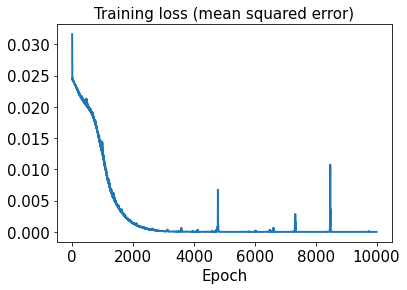

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

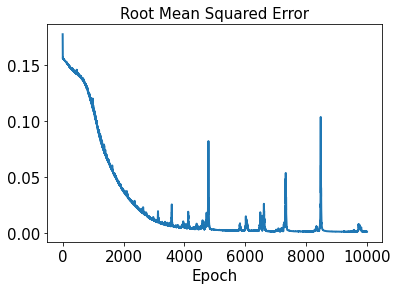

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

2.5173116e-05


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.06981909


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

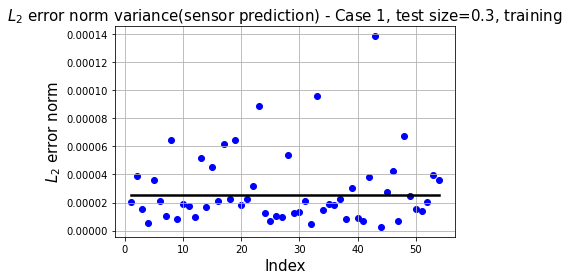

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

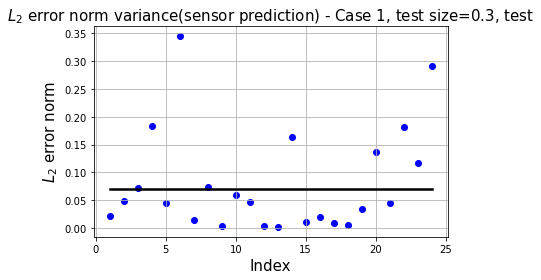

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0113 - rmse: 0.1055
Epoch 2/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0113 - rmse: 0.1054
Epoch 3/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0112 - rmse: 0.1053
Epoch 4/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0112 - rmse: 0.1051
Epoch 5/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0112 - rmse: 0.1050
Epoch 6/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0112 - rmse: 0.1049
Epoch 7/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.1047
Epoch 8/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.1046
Epoch 9/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.1044
Epoch 10/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1042
Epoch 11/10000
2/2 [========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0664
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0661
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 89/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 90/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 92/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 93/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 94/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0641
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 171/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0472
Epoch 175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0466
Epoch 177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0464
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0458
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 9.7810e-04 - rmse: 0.0286
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6976e-04 - rmse: 0.0285
Epoch 256/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6042e-04 - rmse: 0.0283
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4969e-04 - rmse: 0.0281
Epoch 258/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4311e-04 - rmse: 0.0280
Epoch 259/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3552e-04 - rmse: 0.0278
Epoch 260/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2673e-04 - rmse: 0.0277
Epoch 261/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1780e-04 - rmse: 0.0275
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1056e-04 - rmse: 0.0274
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0373e-04 - rmse: 0.0273
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 5.5697e-04 - rmse: 0.0199
Epoch 336/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5835e-04 - rmse: 0.0200
Epoch 337/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5477e-04 - rmse: 0.0199
Epoch 338/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5159e-04 - rmse: 0.0198
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4766e-04 - rmse: 0.0197
Epoch 340/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4511e-04 - rmse: 0.0196
Epoch 341/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4325e-04 - rmse: 0.0196
Epoch 342/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4222e-04 - rmse: 0.0196
Epoch 343/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3991e-04 - rmse: 0.0195
Epoch 344/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3664e-04 - rmse: 0.0194
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 4.1561e-04 - rmse: 0.0160
Epoch 417/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1393e-04 - rmse: 0.0160
Epoch 418/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1232e-04 - rmse: 0.0159
Epoch 419/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1108e-04 - rmse: 0.0159
Epoch 420/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0993e-04 - rmse: 0.0159
Epoch 421/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0845e-04 - rmse: 0.0158
Epoch 422/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0708e-04 - rmse: 0.0158
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0601e-04 - rmse: 0.0157
Epoch 424/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0491e-04 - rmse: 0.0157
Epoch 425/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0287e-04 - rmse: 0.0156
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 3.2469e-04 - rmse: 0.0130
Epoch 498/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2292e-04 - rmse: 0.0129
Epoch 499/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2218e-04 - rmse: 0.0129
Epoch 500/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2161e-04 - rmse: 0.0128
Epoch 501/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2068e-04 - rmse: 0.0128
Epoch 502/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1990e-04 - rmse: 0.0128
Epoch 503/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1910e-04 - rmse: 0.0127
Epoch 504/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1813e-04 - rmse: 0.0127
Epoch 505/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1724e-04 - rmse: 0.0127
Epoch 506/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1617e-04 - rmse: 0.0126
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 2.6788e-04 - rmse: 0.0106
Epoch 579/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6687e-04 - rmse: 0.0106
Epoch 580/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6698e-04 - rmse: 0.0106
Epoch 581/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6606e-04 - rmse: 0.0105
Epoch 582/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6567e-04 - rmse: 0.0105
Epoch 583/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6495e-04 - rmse: 0.0105
Epoch 584/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6467e-04 - rmse: 0.0105
Epoch 585/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6391e-04 - rmse: 0.0104
Epoch 586/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6351e-04 - rmse: 0.0104
Epoch 587/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6331e-04 - rmse: 0.0104
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 2.3391e-04 - rmse: 0.0090
Epoch 660/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3350e-04 - rmse: 0.0090
Epoch 661/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3341e-04 - rmse: 0.0090
Epoch 662/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3284e-04 - rmse: 0.0090
Epoch 663/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3287e-04 - rmse: 0.0090
Epoch 664/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3190e-04 - rmse: 0.0089
Epoch 665/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3187e-04 - rmse: 0.0089
Epoch 666/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3167e-04 - rmse: 0.0089
Epoch 667/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3169e-04 - rmse: 0.0089
Epoch 668/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3126e-04 - rmse: 0.0089
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 2.1262e-04 - rmse: 0.0079
Epoch 741/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1231e-04 - rmse: 0.0079
Epoch 742/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1200e-04 - rmse: 0.0079
Epoch 743/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1178e-04 - rmse: 0.0079
Epoch 744/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1149e-04 - rmse: 0.0078
Epoch 745/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1121e-04 - rmse: 0.0078
Epoch 746/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1089e-04 - rmse: 0.0078
Epoch 747/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1075e-04 - rmse: 0.0078
Epoch 748/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1089e-04 - rmse: 0.0078
Epoch 749/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1025e-04 - rmse: 0.0078
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 1.9759e-04 - rmse: 0.0071
Epoch 822/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9738e-04 - rmse: 0.0071
Epoch 823/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9717e-04 - rmse: 0.0070
Epoch 824/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9714e-04 - rmse: 0.0070
Epoch 825/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9704e-04 - rmse: 0.0070
Epoch 826/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9670e-04 - rmse: 0.0070
Epoch 827/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9654e-04 - rmse: 0.0070
Epoch 828/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9614e-04 - rmse: 0.0070
Epoch 829/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9614e-04 - rmse: 0.0070
Epoch 830/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9630e-04 - rmse: 0.0070
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 1.8624e-04 - rmse: 0.0064
Epoch 903/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8630e-04 - rmse: 0.0064
Epoch 904/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8605e-04 - rmse: 0.0064
Epoch 905/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8607e-04 - rmse: 0.0064
Epoch 906/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8583e-04 - rmse: 0.0064
Epoch 907/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8568e-04 - rmse: 0.0064
Epoch 908/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8553e-04 - rmse: 0.0064
Epoch 909/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8545e-04 - rmse: 0.0064
Epoch 910/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8519e-04 - rmse: 0.0064
Epoch 911/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8526e-04 - rmse: 0.0064
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 1.7735e-04 - rmse: 0.0059
Epoch 984/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7752e-04 - rmse: 0.0059
Epoch 985/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7759e-04 - rmse: 0.0060
Epoch 986/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7732e-04 - rmse: 0.0059
Epoch 987/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7719e-04 - rmse: 0.0059
Epoch 988/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7708e-04 - rmse: 0.0059
Epoch 989/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7710e-04 - rmse: 0.0059
Epoch 990/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7681e-04 - rmse: 0.0059
Epoch 991/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7670e-04 - rmse: 0.0059
Epoch 992/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7648e-04 - rmse: 0.0059
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 1.6930e-04 - rmse: 0.0055
Epoch 1064/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6927e-04 - rmse: 0.0055
Epoch 1065/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6938e-04 - rmse: 0.0055
Epoch 1066/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6925e-04 - rmse: 0.0055
Epoch 1067/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6898e-04 - rmse: 0.0054
Epoch 1068/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6871e-04 - rmse: 0.0054
Epoch 1069/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6884e-04 - rmse: 0.0054
Epoch 1070/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6853e-04 - rmse: 0.0054
Epoch 1071/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6850e-04 - rmse: 0.0054
Epoch 1072/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6842e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.6217e-04 - rmse: 0.0050
Epoch 1144/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6220e-04 - rmse: 0.0051
Epoch 1145/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6220e-04 - rmse: 0.0051
Epoch 1146/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6204e-04 - rmse: 0.0050
Epoch 1147/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6182e-04 - rmse: 0.0050
Epoch 1148/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6186e-04 - rmse: 0.0050
Epoch 1149/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6186e-04 - rmse: 0.0050
Epoch 1150/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6165e-04 - rmse: 0.0050
Epoch 1151/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6157e-04 - rmse: 0.0050
Epoch 1152/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6145e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.5549e-04 - rmse: 0.0046
Epoch 1224/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5542e-04 - rmse: 0.0046
Epoch 1225/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5549e-04 - rmse: 0.0047
Epoch 1226/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5579e-04 - rmse: 0.0047
Epoch 1227/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5560e-04 - rmse: 0.0047
Epoch 1228/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5536e-04 - rmse: 0.0047
Epoch 1229/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5525e-04 - rmse: 0.0046
Epoch 1230/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5510e-04 - rmse: 0.0046
Epoch 1231/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5499e-04 - rmse: 0.0046
Epoch 1232/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5487e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.4968e-04 - rmse: 0.0043
Epoch 1304/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4965e-04 - rmse: 0.0043
Epoch 1305/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4953e-04 - rmse: 0.0043
Epoch 1306/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4942e-04 - rmse: 0.0043
Epoch 1307/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4934e-04 - rmse: 0.0043
Epoch 1308/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4942e-04 - rmse: 0.0043
Epoch 1309/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4923e-04 - rmse: 0.0043
Epoch 1310/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4913e-04 - rmse: 0.0043
Epoch 1311/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4904e-04 - rmse: 0.0043
Epoch 1312/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4909e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.4436e-04 - rmse: 0.0040
Epoch 1384/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4438e-04 - rmse: 0.0040
Epoch 1385/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4429e-04 - rmse: 0.0040
Epoch 1386/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4421e-04 - rmse: 0.0040
Epoch 1387/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4432e-04 - rmse: 0.0040
Epoch 1388/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4398e-04 - rmse: 0.0040
Epoch 1389/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4401e-04 - rmse: 0.0040
Epoch 1390/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4394e-04 - rmse: 0.0040
Epoch 1391/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4392e-04 - rmse: 0.0040
Epoch 1392/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4376e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.3935e-04 - rmse: 0.0037
Epoch 1464/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3937e-04 - rmse: 0.0037
Epoch 1465/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3927e-04 - rmse: 0.0037
Epoch 1466/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3909e-04 - rmse: 0.0037
Epoch 1467/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3923e-04 - rmse: 0.0037
Epoch 1468/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3916e-04 - rmse: 0.0037
Epoch 1469/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3904e-04 - rmse: 0.0037
Epoch 1470/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3890e-04 - rmse: 0.0037
Epoch 1471/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3911e-04 - rmse: 0.0037
Epoch 1472/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3896e-04 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 1.3509e-04 - rmse: 0.0035
Epoch 1544/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3488e-04 - rmse: 0.0035
Epoch 1545/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3488e-04 - rmse: 0.0035
Epoch 1546/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3495e-04 - rmse: 0.0035
Epoch 1547/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3476e-04 - rmse: 0.0035
Epoch 1548/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3468e-04 - rmse: 0.0035
Epoch 1549/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3466e-04 - rmse: 0.0035
Epoch 1550/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3467e-04 - rmse: 0.0035
Epoch 1551/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3460e-04 - rmse: 0.0035
Epoch 1552/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3452e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.3120e-04 - rmse: 0.0034
Epoch 1624/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3094e-04 - rmse: 0.0033
Epoch 1625/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3093e-04 - rmse: 0.0033
Epoch 1626/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3091e-04 - rmse: 0.0033
Epoch 1627/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3091e-04 - rmse: 0.0033
Epoch 1628/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3075e-04 - rmse: 0.0033
Epoch 1629/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3064e-04 - rmse: 0.0033
Epoch 1630/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3063e-04 - rmse: 0.0033
Epoch 1631/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3067e-04 - rmse: 0.0033
Epoch 1632/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3057e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.2712e-04 - rmse: 0.0031
Epoch 1704/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2705e-04 - rmse: 0.0031
Epoch 1705/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2713e-04 - rmse: 0.0032
Epoch 1706/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2709e-04 - rmse: 0.0032
Epoch 1707/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2701e-04 - rmse: 0.0032
Epoch 1708/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2682e-04 - rmse: 0.0031
Epoch 1709/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2681e-04 - rmse: 0.0031
Epoch 1710/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2685e-04 - rmse: 0.0031
Epoch 1711/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2670e-04 - rmse: 0.0031
Epoch 1712/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2670e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.2351e-04 - rmse: 0.0030
Epoch 1784/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2345e-04 - rmse: 0.0030
Epoch 1785/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2333e-04 - rmse: 0.0030
Epoch 1786/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2327e-04 - rmse: 0.0030
Epoch 1787/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2328e-04 - rmse: 0.0030
Epoch 1788/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2321e-04 - rmse: 0.0030
Epoch 1789/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2336e-04 - rmse: 0.0030
Epoch 1790/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2331e-04 - rmse: 0.0030
Epoch 1791/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2321e-04 - rmse: 0.0030
Epoch 1792/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2317e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.2018e-04 - rmse: 0.0029
Epoch 1864/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2003e-04 - rmse: 0.0029
Epoch 1865/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2007e-04 - rmse: 0.0029
Epoch 1866/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2003e-04 - rmse: 0.0029
Epoch 1867/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1992e-04 - rmse: 0.0029
Epoch 1868/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1979e-04 - rmse: 0.0029
Epoch 1869/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1985e-04 - rmse: 0.0029
Epoch 1870/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1979e-04 - rmse: 0.0029
Epoch 1871/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1977e-04 - rmse: 0.0029
Epoch 1872/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1970e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.1684e-04 - rmse: 0.0028
Epoch 1944/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1682e-04 - rmse: 0.0028
Epoch 1945/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1678e-04 - rmse: 0.0028
Epoch 1946/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1673e-04 - rmse: 0.0028
Epoch 1947/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1659e-04 - rmse: 0.0028
Epoch 1948/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1681e-04 - rmse: 0.0028
Epoch 1949/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1680e-04 - rmse: 0.0028
Epoch 1950/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1675e-04 - rmse: 0.0028
Epoch 1951/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1667e-04 - rmse: 0.0028
Epoch 1952/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1659e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.1370e-04 - rmse: 0.0027
Epoch 2024/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1364e-04 - rmse: 0.0027
Epoch 2025/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1365e-04 - rmse: 0.0027
Epoch 2026/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1353e-04 - rmse: 0.0027
Epoch 2027/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1357e-04 - rmse: 0.0027
Epoch 2028/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1346e-04 - rmse: 0.0027
Epoch 2029/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1354e-04 - rmse: 0.0027
Epoch 2030/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1343e-04 - rmse: 0.0027
Epoch 2031/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1342e-04 - rmse: 0.0027
Epoch 2032/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1328e-04 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.1081e-04 - rmse: 0.0026
Epoch 2104/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1076e-04 - rmse: 0.0026
Epoch 2105/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1059e-04 - rmse: 0.0026
Epoch 2106/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1065e-04 - rmse: 0.0026
Epoch 2107/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1052e-04 - rmse: 0.0026
Epoch 2108/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1054e-04 - rmse: 0.0026
Epoch 2109/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1053e-04 - rmse: 0.0026
Epoch 2110/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1046e-04 - rmse: 0.0026
Epoch 2111/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1053e-04 - rmse: 0.0026
Epoch 2112/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1049e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0781e-04 - rmse: 0.0025
Epoch 2184/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0779e-04 - rmse: 0.0025
Epoch 2185/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0770e-04 - rmse: 0.0025
Epoch 2186/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0769e-04 - rmse: 0.0025
Epoch 2187/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0765e-04 - rmse: 0.0025
Epoch 2188/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0754e-04 - rmse: 0.0025
Epoch 2189/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0748e-04 - rmse: 0.0025
Epoch 2190/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0744e-04 - rmse: 0.0025
Epoch 2191/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0745e-04 - rmse: 0.0025
Epoch 2192/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0745e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0488e-04 - rmse: 0.0024
Epoch 2264/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0496e-04 - rmse: 0.0025
Epoch 2265/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0492e-04 - rmse: 0.0025
Epoch 2266/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0489e-04 - rmse: 0.0025
Epoch 2267/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0481e-04 - rmse: 0.0025
Epoch 2268/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0487e-04 - rmse: 0.0025
Epoch 2269/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0478e-04 - rmse: 0.0025
Epoch 2270/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0476e-04 - rmse: 0.0025
Epoch 2271/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0466e-04 - rmse: 0.0025
Epoch 2272/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0460e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.0218e-04 - rmse: 0.0024
Epoch 2344/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0216e-04 - rmse: 0.0024
Epoch 2345/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0220e-04 - rmse: 0.0024
Epoch 2346/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0208e-04 - rmse: 0.0024
Epoch 2347/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0212e-04 - rmse: 0.0024
Epoch 2348/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0205e-04 - rmse: 0.0024
Epoch 2349/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0199e-04 - rmse: 0.0024
Epoch 2350/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0192e-04 - rmse: 0.0024
Epoch 2351/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0186e-04 - rmse: 0.0024
Epoch 2352/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0184e-04 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 9.9407e-05 - rmse: 0.0023
Epoch 2424/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9375e-05 - rmse: 0.0023
Epoch 2425/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9333e-05 - rmse: 0.0023
Epoch 2426/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9308e-05 - rmse: 0.0023
Epoch 2427/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9244e-05 - rmse: 0.0023
Epoch 2428/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9291e-05 - rmse: 0.0023
Epoch 2429/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9195e-05 - rmse: 0.0023
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9178e-05 - rmse: 0.0023
Epoch 2431/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9160e-05 - rmse: 0.0023
Epoch 2432/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9138e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.6951e-05 - rmse: 0.0023
Epoch 2504/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6842e-05 - rmse: 0.0023
Epoch 2505/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6876e-05 - rmse: 0.0023
Epoch 2506/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6762e-05 - rmse: 0.0022
Epoch 2507/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6681e-05 - rmse: 0.0022
Epoch 2508/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6656e-05 - rmse: 0.0022
Epoch 2509/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6626e-05 - rmse: 0.0022
Epoch 2510/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6556e-05 - rmse: 0.0022
Epoch 2511/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6534e-05 - rmse: 0.0022
Epoch 2512/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6500e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 9.4460e-05 - rmse: 0.0022
Epoch 2584/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4338e-05 - rmse: 0.0022
Epoch 2585/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4374e-05 - rmse: 0.0022
Epoch 2586/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4376e-05 - rmse: 0.0022
Epoch 2587/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4365e-05 - rmse: 0.0022
Epoch 2588/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4380e-05 - rmse: 0.0022
Epoch 2589/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4599e-05 - rmse: 0.0023
Epoch 2590/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4392e-05 - rmse: 0.0022
Epoch 2591/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4336e-05 - rmse: 0.0022
Epoch 2592/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4189e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.2001e-05 - rmse: 0.0022
Epoch 2664/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1956e-05 - rmse: 0.0021
Epoch 2665/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1944e-05 - rmse: 0.0022
Epoch 2666/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2031e-05 - rmse: 0.0022
Epoch 2667/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1915e-05 - rmse: 0.0022
Epoch 2668/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1875e-05 - rmse: 0.0022
Epoch 2669/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1766e-05 - rmse: 0.0021
Epoch 2670/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1700e-05 - rmse: 0.0021
Epoch 2671/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1703e-05 - rmse: 0.0021
Epoch 2672/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1658e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.9625e-05 - rmse: 0.0021
Epoch 2744/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9589e-05 - rmse: 0.0021
Epoch 2745/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9654e-05 - rmse: 0.0021
Epoch 2746/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9588e-05 - rmse: 0.0021
Epoch 2747/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.9601e-05 - rmse: 0.0021
Epoch 2748/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9638e-05 - rmse: 0.0021
Epoch 2749/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9466e-05 - rmse: 0.0021
Epoch 2750/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9462e-05 - rmse: 0.0021
Epoch 2751/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9446e-05 - rmse: 0.0021
Epoch 2752/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9432e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.7302e-05 - rmse: 0.0020
Epoch 2824/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7294e-05 - rmse: 0.0020
Epoch 2825/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7311e-05 - rmse: 0.0020
Epoch 2826/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7276e-05 - rmse: 0.0020
Epoch 2827/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7231e-05 - rmse: 0.0020
Epoch 2828/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7125e-05 - rmse: 0.0020
Epoch 2829/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7113e-05 - rmse: 0.0020
Epoch 2830/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7188e-05 - rmse: 0.0020
Epoch 2831/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7152e-05 - rmse: 0.0020
Epoch 2832/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7026e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.5255e-05 - rmse: 0.0020
Epoch 2904/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5219e-05 - rmse: 0.0020
Epoch 2905/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5098e-05 - rmse: 0.0020
Epoch 2906/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5024e-05 - rmse: 0.0020
Epoch 2907/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5035e-05 - rmse: 0.0020
Epoch 2908/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4945e-05 - rmse: 0.0020
Epoch 2909/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4971e-05 - rmse: 0.0020
Epoch 2910/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.4912e-05 - rmse: 0.0020
Epoch 2911/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4876e-05 - rmse: 0.0020
Epoch 2912/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4915e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 8.3029e-05 - rmse: 0.0019
Epoch 2984/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2959e-05 - rmse: 0.0019
Epoch 2985/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2945e-05 - rmse: 0.0019
Epoch 2986/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2901e-05 - rmse: 0.0019
Epoch 2987/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2908e-05 - rmse: 0.0019
Epoch 2988/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2919e-05 - rmse: 0.0019
Epoch 2989/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2895e-05 - rmse: 0.0019
Epoch 2990/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2816e-05 - rmse: 0.0019
Epoch 2991/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2770e-05 - rmse: 0.0019
Epoch 2992/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2845e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 8.0931e-05 - rmse: 0.0019
Epoch 3064/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0874e-05 - rmse: 0.0019
Epoch 3065/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0891e-05 - rmse: 0.0019
Epoch 3066/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0846e-05 - rmse: 0.0019
Epoch 3067/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0830e-05 - rmse: 0.0019
Epoch 3068/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0777e-05 - rmse: 0.0019
Epoch 3069/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0733e-05 - rmse: 0.0019
Epoch 3070/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0659e-05 - rmse: 0.0019
Epoch 3071/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0635e-05 - rmse: 0.0019
Epoch 3072/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0595e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.9441e-05 - rmse: 0.0020
Epoch 3144/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9231e-05 - rmse: 0.0019
Epoch 3145/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9280e-05 - rmse: 0.0020
Epoch 3146/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9274e-05 - rmse: 0.0020
Epoch 3147/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9195e-05 - rmse: 0.0019
Epoch 3148/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9063e-05 - rmse: 0.0019
Epoch 3149/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9088e-05 - rmse: 0.0019
Epoch 3150/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8997e-05 - rmse: 0.0019
Epoch 3151/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8934e-05 - rmse: 0.0019
Epoch 3152/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8988e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.6927e-05 - rmse: 0.0018
Epoch 3224/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6969e-05 - rmse: 0.0018
Epoch 3225/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6926e-05 - rmse: 0.0018
Epoch 3226/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6911e-05 - rmse: 0.0018
Epoch 3227/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6819e-05 - rmse: 0.0018
Epoch 3228/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6848e-05 - rmse: 0.0018
Epoch 3229/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6761e-05 - rmse: 0.0018
Epoch 3230/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6768e-05 - rmse: 0.0018
Epoch 3231/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6730e-05 - rmse: 0.0018
Epoch 3232/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6671e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.5075e-05 - rmse: 0.0017
Epoch 3304/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5053e-05 - rmse: 0.0017
Epoch 3305/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4985e-05 - rmse: 0.0017
Epoch 3306/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4962e-05 - rmse: 0.0017
Epoch 3307/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4950e-05 - rmse: 0.0017
Epoch 3308/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4919e-05 - rmse: 0.0017
Epoch 3309/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4912e-05 - rmse: 0.0017
Epoch 3310/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4835e-05 - rmse: 0.0017
Epoch 3311/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4864e-05 - rmse: 0.0017
Epoch 3312/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4847e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.3234e-05 - rmse: 0.0017
Epoch 3384/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3213e-05 - rmse: 0.0017
Epoch 3385/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3202e-05 - rmse: 0.0017
Epoch 3386/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3146e-05 - rmse: 0.0017
Epoch 3387/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3137e-05 - rmse: 0.0017
Epoch 3388/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3113e-05 - rmse: 0.0017
Epoch 3389/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3124e-05 - rmse: 0.0017
Epoch 3390/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3103e-05 - rmse: 0.0017
Epoch 3391/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3044e-05 - rmse: 0.0017
Epoch 3392/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3089e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 7.1924e-05 - rmse: 0.0018
Epoch 3464/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1792e-05 - rmse: 0.0018
Epoch 3465/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1875e-05 - rmse: 0.0018
Epoch 3466/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1795e-05 - rmse: 0.0018
Epoch 3467/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1643e-05 - rmse: 0.0017
Epoch 3468/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1938e-05 - rmse: 0.0018
Epoch 3469/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2070e-05 - rmse: 0.0019
Epoch 3470/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2222e-05 - rmse: 0.0019
Epoch 3471/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2227e-05 - rmse: 0.0019
Epoch 3472/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2377e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.0063e-05 - rmse: 0.0017
Epoch 3544/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0065e-05 - rmse: 0.0017
Epoch 3545/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0109e-05 - rmse: 0.0017
Epoch 3546/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9970e-05 - rmse: 0.0017
Epoch 3547/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9912e-05 - rmse: 0.0017
Epoch 3548/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9974e-05 - rmse: 0.0017
Epoch 3549/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9944e-05 - rmse: 0.0017
Epoch 3550/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9986e-05 - rmse: 0.0017
Epoch 3551/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0107e-05 - rmse: 0.0018
Epoch 3552/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0050e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.8437e-05 - rmse: 0.0016
Epoch 3624/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8354e-05 - rmse: 0.0016
Epoch 3625/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8333e-05 - rmse: 0.0016
Epoch 3626/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8333e-05 - rmse: 0.0016
Epoch 3627/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8317e-05 - rmse: 0.0016
Epoch 3628/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8319e-05 - rmse: 0.0016
Epoch 3629/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8296e-05 - rmse: 0.0016
Epoch 3630/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8237e-05 - rmse: 0.0016
Epoch 3631/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8244e-05 - rmse: 0.0016
Epoch 3632/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8209e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.6766e-05 - rmse: 0.0016
Epoch 3704/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6766e-05 - rmse: 0.0016
Epoch 3705/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6727e-05 - rmse: 0.0016
Epoch 3706/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6711e-05 - rmse: 0.0016
Epoch 3707/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6702e-05 - rmse: 0.0016
Epoch 3708/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6711e-05 - rmse: 0.0016
Epoch 3709/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6717e-05 - rmse: 0.0016
Epoch 3710/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6665e-05 - rmse: 0.0016
Epoch 3711/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6662e-05 - rmse: 0.0016
Epoch 3712/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6671e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.5294e-05 - rmse: 0.0015
Epoch 3784/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5333e-05 - rmse: 0.0016
Epoch 3785/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5302e-05 - rmse: 0.0016
Epoch 3786/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5291e-05 - rmse: 0.0016
Epoch 3787/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5212e-05 - rmse: 0.0015
Epoch 3788/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5252e-05 - rmse: 0.0016
Epoch 3789/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5250e-05 - rmse: 0.0016
Epoch 3790/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5209e-05 - rmse: 0.0016
Epoch 3791/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5200e-05 - rmse: 0.0016
Epoch 3792/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5177e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.3864e-05 - rmse: 0.0015
Epoch 3864/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3869e-05 - rmse: 0.0015
Epoch 3865/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3822e-05 - rmse: 0.0015
Epoch 3866/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3823e-05 - rmse: 0.0015
Epoch 3867/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3794e-05 - rmse: 0.0015
Epoch 3868/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3810e-05 - rmse: 0.0015
Epoch 3869/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3802e-05 - rmse: 0.0015
Epoch 3870/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3775e-05 - rmse: 0.0015
Epoch 3871/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3765e-05 - rmse: 0.0015
Epoch 3872/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3751e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.2465e-05 - rmse: 0.0015
Epoch 3944/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2443e-05 - rmse: 0.0015
Epoch 3945/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2448e-05 - rmse: 0.0015
Epoch 3946/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2444e-05 - rmse: 0.0015
Epoch 3947/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2426e-05 - rmse: 0.0015
Epoch 3948/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2398e-05 - rmse: 0.0015
Epoch 3949/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2413e-05 - rmse: 0.0015
Epoch 3950/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2427e-05 - rmse: 0.0015
Epoch 3951/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2494e-05 - rmse: 0.0016
Epoch 3952/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2501e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.1393e-05 - rmse: 0.0016
Epoch 4024/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1500e-05 - rmse: 0.0016
Epoch 4025/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1456e-05 - rmse: 0.0016
Epoch 4026/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1424e-05 - rmse: 0.0016
Epoch 4027/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1559e-05 - rmse: 0.0017
Epoch 4028/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1558e-05 - rmse: 0.0017
Epoch 4029/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1488e-05 - rmse: 0.0016
Epoch 4030/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1521e-05 - rmse: 0.0017
Epoch 4031/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1600e-05 - rmse: 0.0017
Epoch 4032/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1334e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.9871e-05 - rmse: 0.0015
Epoch 4104/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9854e-05 - rmse: 0.0015
Epoch 4105/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9797e-05 - rmse: 0.0015
Epoch 4106/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9769e-05 - rmse: 0.0015
Epoch 4107/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9783e-05 - rmse: 0.0015
Epoch 4108/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9836e-05 - rmse: 0.0015
Epoch 4109/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9858e-05 - rmse: 0.0015
Epoch 4110/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9708e-05 - rmse: 0.0015
Epoch 4111/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9726e-05 - rmse: 0.0015
Epoch 4112/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9692e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.8793e-05 - rmse: 0.0015
Epoch 4184/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8648e-05 - rmse: 0.0015
Epoch 4185/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8574e-05 - rmse: 0.0015
Epoch 4186/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8661e-05 - rmse: 0.0015
Epoch 4187/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8605e-05 - rmse: 0.0015
Epoch 4188/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8515e-05 - rmse: 0.0015
Epoch 4189/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8490e-05 - rmse: 0.0015
Epoch 4190/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8529e-05 - rmse: 0.0015
Epoch 4191/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8538e-05 - rmse: 0.0015
Epoch 4192/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8447e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.7481e-05 - rmse: 0.0015
Epoch 4264/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7560e-05 - rmse: 0.0015
Epoch 4265/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7441e-05 - rmse: 0.0015
Epoch 4266/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7385e-05 - rmse: 0.0015
Epoch 4267/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7343e-05 - rmse: 0.0015
Epoch 4268/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7339e-05 - rmse: 0.0015
Epoch 4269/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7313e-05 - rmse: 0.0015
Epoch 4270/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7343e-05 - rmse: 0.0015
Epoch 4271/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7379e-05 - rmse: 0.0015
Epoch 4272/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7419e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.6209e-05 - rmse: 0.0014
Epoch 4344/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6203e-05 - rmse: 0.0014
Epoch 4345/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6165e-05 - rmse: 0.0014
Epoch 4346/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6178e-05 - rmse: 0.0014
Epoch 4347/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6112e-05 - rmse: 0.0014
Epoch 4348/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6080e-05 - rmse: 0.0014
Epoch 4349/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6059e-05 - rmse: 0.0014
Epoch 4350/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6036e-05 - rmse: 0.0014
Epoch 4351/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6015e-05 - rmse: 0.0014
Epoch 4352/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6050e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.5013e-05 - rmse: 0.0014
Epoch 4424/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5018e-05 - rmse: 0.0014
Epoch 4425/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4990e-05 - rmse: 0.0014
Epoch 4426/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4954e-05 - rmse: 0.0014
Epoch 4427/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4922e-05 - rmse: 0.0014
Epoch 4428/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4949e-05 - rmse: 0.0014
Epoch 4429/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4911e-05 - rmse: 0.0014
Epoch 4430/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4916e-05 - rmse: 0.0014
Epoch 4431/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4908e-05 - rmse: 0.0014
Epoch 4432/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4903e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.3867e-05 - rmse: 0.0014
Epoch 4504/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3890e-05 - rmse: 0.0014
Epoch 4505/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3857e-05 - rmse: 0.0014
Epoch 4506/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3848e-05 - rmse: 0.0014
Epoch 4507/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3819e-05 - rmse: 0.0014
Epoch 4508/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3766e-05 - rmse: 0.0013
Epoch 4509/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3773e-05 - rmse: 0.0014
Epoch 4510/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3757e-05 - rmse: 0.0013
Epoch 4511/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3735e-05 - rmse: 0.0013
Epoch 4512/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3757e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.2834e-05 - rmse: 0.0014
Epoch 4584/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2792e-05 - rmse: 0.0014
Epoch 4585/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2779e-05 - rmse: 0.0014
Epoch 4586/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2735e-05 - rmse: 0.0013
Epoch 4587/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2741e-05 - rmse: 0.0013
Epoch 4588/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2755e-05 - rmse: 0.0014
Epoch 4589/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2724e-05 - rmse: 0.0013
Epoch 4590/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2722e-05 - rmse: 0.0014
Epoch 4591/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2738e-05 - rmse: 0.0014
Epoch 4592/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2744e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.1920e-05 - rmse: 0.0014
Epoch 4664/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1954e-05 - rmse: 0.0014
Epoch 4665/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2022e-05 - rmse: 0.0014
Epoch 4666/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2251e-05 - rmse: 0.0015
Epoch 4667/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2237e-05 - rmse: 0.0015
Epoch 4668/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2080e-05 - rmse: 0.0015
Epoch 4669/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2097e-05 - rmse: 0.0015
Epoch 4670/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2224e-05 - rmse: 0.0015
Epoch 4671/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2132e-05 - rmse: 0.0015
Epoch 4672/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2087e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.0749e-05 - rmse: 0.0013
Epoch 4744/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0719e-05 - rmse: 0.0013
Epoch 4745/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0698e-05 - rmse: 0.0013
Epoch 4746/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0694e-05 - rmse: 0.0013
Epoch 4747/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0692e-05 - rmse: 0.0013
Epoch 4748/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0721e-05 - rmse: 0.0013
Epoch 4749/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0800e-05 - rmse: 0.0014
Epoch 4750/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0698e-05 - rmse: 0.0013
Epoch 4751/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0732e-05 - rmse: 0.0014
Epoch 4752/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0738e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.9735e-05 - rmse: 0.0013
Epoch 4824/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9736e-05 - rmse: 0.0013
Epoch 4825/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9694e-05 - rmse: 0.0013
Epoch 4826/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9683e-05 - rmse: 0.0013
Epoch 4827/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9706e-05 - rmse: 0.0013
Epoch 4828/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9696e-05 - rmse: 0.0013
Epoch 4829/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9663e-05 - rmse: 0.0013
Epoch 4830/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9665e-05 - rmse: 0.0013
Epoch 4831/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9628e-05 - rmse: 0.0013
Epoch 4832/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9616e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.8837e-05 - rmse: 0.0013
Epoch 4904/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8823e-05 - rmse: 0.0013
Epoch 4905/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8849e-05 - rmse: 0.0013
Epoch 4906/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8963e-05 - rmse: 0.0014
Epoch 4907/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8968e-05 - rmse: 0.0014
Epoch 4908/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8808e-05 - rmse: 0.0013
Epoch 4909/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8799e-05 - rmse: 0.0013
Epoch 4910/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8782e-05 - rmse: 0.0013
Epoch 4911/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8814e-05 - rmse: 0.0013
Epoch 4912/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8780e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.8491e-05 - rmse: 0.0015
Epoch 4984/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8441e-05 - rmse: 0.0015
Epoch 4985/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8756e-05 - rmse: 0.0016
Epoch 4986/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8789e-05 - rmse: 0.0016
Epoch 4987/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8662e-05 - rmse: 0.0016
Epoch 4988/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8800e-05 - rmse: 0.0016
Epoch 4989/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8534e-05 - rmse: 0.0015
Epoch 4990/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8496e-05 - rmse: 0.0015
Epoch 4991/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8600e-05 - rmse: 0.0016
Epoch 4992/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8313e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 4.6941e-05 - rmse: 0.0013
Epoch 5064/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6967e-05 - rmse: 0.0013
Epoch 5065/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6952e-05 - rmse: 0.0013
Epoch 5066/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6932e-05 - rmse: 0.0013
Epoch 5067/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6911e-05 - rmse: 0.0013
Epoch 5068/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6901e-05 - rmse: 0.0013
Epoch 5069/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6863e-05 - rmse: 0.0013
Epoch 5070/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6881e-05 - rmse: 0.0013
Epoch 5071/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6882e-05 - rmse: 0.0013
Epoch 5072/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6871e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.6204e-05 - rmse: 0.0013
Epoch 5144/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6166e-05 - rmse: 0.0013
Epoch 5145/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6090e-05 - rmse: 0.0013
Epoch 5146/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6086e-05 - rmse: 0.0013
Epoch 5147/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6085e-05 - rmse: 0.0013
Epoch 5148/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6068e-05 - rmse: 0.0013
Epoch 5149/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6060e-05 - rmse: 0.0013
Epoch 5150/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6092e-05 - rmse: 0.0013
Epoch 5151/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6032e-05 - rmse: 0.0013
Epoch 5152/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6044e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.5812e-05 - rmse: 0.0014
Epoch 5224/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5837e-05 - rmse: 0.0015
Epoch 5225/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5799e-05 - rmse: 0.0014
Epoch 5226/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5628e-05 - rmse: 0.0014
Epoch 5227/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5585e-05 - rmse: 0.0014
Epoch 5228/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5618e-05 - rmse: 0.0014
Epoch 5229/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5613e-05 - rmse: 0.0014
Epoch 5230/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5442e-05 - rmse: 0.0013
Epoch 5231/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5576e-05 - rmse: 0.0014
Epoch 5232/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5342e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.4482e-05 - rmse: 0.0012
Epoch 5304/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4503e-05 - rmse: 0.0013
Epoch 5305/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4522e-05 - rmse: 0.0013
Epoch 5306/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4555e-05 - rmse: 0.0013
Epoch 5307/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4526e-05 - rmse: 0.0013
Epoch 5308/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4523e-05 - rmse: 0.0013
Epoch 5309/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4641e-05 - rmse: 0.0013
Epoch 5310/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4688e-05 - rmse: 0.0013
Epoch 5311/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4593e-05 - rmse: 0.0013
Epoch 5312/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4596e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.3750e-05 - rmse: 0.0012
Epoch 5384/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3748e-05 - rmse: 0.0013
Epoch 5385/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3721e-05 - rmse: 0.0012
Epoch 5386/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3681e-05 - rmse: 0.0012
Epoch 5387/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3651e-05 - rmse: 0.0012
Epoch 5388/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3652e-05 - rmse: 0.0012
Epoch 5389/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3640e-05 - rmse: 0.0012
Epoch 5390/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3611e-05 - rmse: 0.0012
Epoch 5391/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3633e-05 - rmse: 0.0012
Epoch 5392/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3603e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 4.3017e-05 - rmse: 0.0013
Epoch 5464/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3015e-05 - rmse: 0.0013
Epoch 5465/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2969e-05 - rmse: 0.0012
Epoch 5466/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3029e-05 - rmse: 0.0013
Epoch 5467/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3126e-05 - rmse: 0.0013
Epoch 5468/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3072e-05 - rmse: 0.0013
Epoch 5469/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3033e-05 - rmse: 0.0013
Epoch 5470/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2975e-05 - rmse: 0.0013
Epoch 5471/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3044e-05 - rmse: 0.0013
Epoch 5472/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2999e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 4.2410e-05 - rmse: 0.0013
Epoch 5544/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2337e-05 - rmse: 0.0013
Epoch 5545/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2321e-05 - rmse: 0.0013
Epoch 5546/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2335e-05 - rmse: 0.0013
Epoch 5547/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2296e-05 - rmse: 0.0013
Epoch 5548/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2352e-05 - rmse: 0.0013
Epoch 5549/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2315e-05 - rmse: 0.0013
Epoch 5550/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2312e-05 - rmse: 0.0013
Epoch 5551/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2317e-05 - rmse: 0.0013
Epoch 5552/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2332e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.1803e-05 - rmse: 0.0013
Epoch 5624/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1883e-05 - rmse: 0.0014
Epoch 5625/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2115e-05 - rmse: 0.0014
Epoch 5626/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2209e-05 - rmse: 0.0015
Epoch 5627/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2217e-05 - rmse: 0.0015
Epoch 5628/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2407e-05 - rmse: 0.0015
Epoch 5629/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2132e-05 - rmse: 0.0015
Epoch 5630/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2108e-05 - rmse: 0.0015
Epoch 5631/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1998e-05 - rmse: 0.0014
Epoch 5632/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1973e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.0785e-05 - rmse: 0.0012
Epoch 5704/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0758e-05 - rmse: 0.0012
Epoch 5705/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0774e-05 - rmse: 0.0012
Epoch 5706/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0760e-05 - rmse: 0.0012
Epoch 5707/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0760e-05 - rmse: 0.0012
Epoch 5708/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0742e-05 - rmse: 0.0012
Epoch 5709/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0719e-05 - rmse: 0.0012
Epoch 5710/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0725e-05 - rmse: 0.0012
Epoch 5711/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0730e-05 - rmse: 0.0012
Epoch 5712/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0713e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 4.0094e-05 - rmse: 0.0012
Epoch 5784/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0088e-05 - rmse: 0.0012
Epoch 5785/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0087e-05 - rmse: 0.0012
Epoch 5786/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0091e-05 - rmse: 0.0012
Epoch 5787/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0087e-05 - rmse: 0.0012
Epoch 5788/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0068e-05 - rmse: 0.0012
Epoch 5789/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0076e-05 - rmse: 0.0012
Epoch 5790/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0051e-05 - rmse: 0.0012
Epoch 5791/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0030e-05 - rmse: 0.0012
Epoch 5792/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0044e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.9506e-05 - rmse: 0.0012
Epoch 5864/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9484e-05 - rmse: 0.0012
Epoch 5865/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9493e-05 - rmse: 0.0012
Epoch 5866/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9470e-05 - rmse: 0.0012
Epoch 5867/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9443e-05 - rmse: 0.0012
Epoch 5868/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9441e-05 - rmse: 0.0012
Epoch 5869/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9459e-05 - rmse: 0.0012
Epoch 5870/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9491e-05 - rmse: 0.0012
Epoch 5871/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9460e-05 - rmse: 0.0012
Epoch 5872/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9499e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.8894e-05 - rmse: 0.0012
Epoch 5944/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8879e-05 - rmse: 0.0012
Epoch 5945/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8871e-05 - rmse: 0.0012
Epoch 5946/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8866e-05 - rmse: 0.0012
Epoch 5947/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8830e-05 - rmse: 0.0012
Epoch 5948/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8810e-05 - rmse: 0.0012
Epoch 5949/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8795e-05 - rmse: 0.0012
Epoch 5950/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8805e-05 - rmse: 0.0012
Epoch 5951/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8793e-05 - rmse: 0.0012
Epoch 5952/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8781e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.8349e-05 - rmse: 0.0012
Epoch 6024/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8347e-05 - rmse: 0.0012
Epoch 6025/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8334e-05 - rmse: 0.0012
Epoch 6026/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8346e-05 - rmse: 0.0012
Epoch 6027/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8241e-05 - rmse: 0.0012
Epoch 6028/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8259e-05 - rmse: 0.0012
Epoch 6029/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8234e-05 - rmse: 0.0012
Epoch 6030/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8235e-05 - rmse: 0.0012
Epoch 6031/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8245e-05 - rmse: 0.0012
Epoch 6032/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8314e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.7649e-05 - rmse: 0.0012
Epoch 6104/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7759e-05 - rmse: 0.0012
Epoch 6105/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7691e-05 - rmse: 0.0012
Epoch 6106/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7677e-05 - rmse: 0.0012
Epoch 6107/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7641e-05 - rmse: 0.0012
Epoch 6108/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7683e-05 - rmse: 0.0012
Epoch 6109/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7641e-05 - rmse: 0.0012
Epoch 6110/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7616e-05 - rmse: 0.0012
Epoch 6111/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7579e-05 - rmse: 0.0012
Epoch 6112/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7584e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.7272e-05 - rmse: 0.0012
Epoch 6184/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7284e-05 - rmse: 0.0012
Epoch 6185/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7326e-05 - rmse: 0.0013
Epoch 6186/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7421e-05 - rmse: 0.0013
Epoch 6187/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7339e-05 - rmse: 0.0013
Epoch 6188/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7351e-05 - rmse: 0.0013
Epoch 6189/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7347e-05 - rmse: 0.0013
Epoch 6190/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7227e-05 - rmse: 0.0012
Epoch 6191/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7190e-05 - rmse: 0.0012
Epoch 6192/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7154e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.6500e-05 - rmse: 0.0011
Epoch 6264/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6507e-05 - rmse: 0.0011
Epoch 6265/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6503e-05 - rmse: 0.0011
Epoch 6266/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6525e-05 - rmse: 0.0011
Epoch 6267/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6588e-05 - rmse: 0.0012
Epoch 6268/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6544e-05 - rmse: 0.0012
Epoch 6269/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6664e-05 - rmse: 0.0012
Epoch 6270/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6666e-05 - rmse: 0.0012
Epoch 6271/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6542e-05 - rmse: 0.0012
Epoch 6272/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6516e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.6014e-05 - rmse: 0.0011
Epoch 6344/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5984e-05 - rmse: 0.0011
Epoch 6345/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5965e-05 - rmse: 0.0011
Epoch 6346/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5931e-05 - rmse: 0.0011
Epoch 6347/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5959e-05 - rmse: 0.0011
Epoch 6348/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5932e-05 - rmse: 0.0011
Epoch 6349/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5955e-05 - rmse: 0.0011
Epoch 6350/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5936e-05 - rmse: 0.0011
Epoch 6351/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5937e-05 - rmse: 0.0011
Epoch 6352/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5901e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.5601e-05 - rmse: 0.0012
Epoch 6424/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5581e-05 - rmse: 0.0012
Epoch 6425/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5526e-05 - rmse: 0.0012
Epoch 6426/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5632e-05 - rmse: 0.0012
Epoch 6427/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5628e-05 - rmse: 0.0012
Epoch 6428/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5739e-05 - rmse: 0.0013
Epoch 6429/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5646e-05 - rmse: 0.0012
Epoch 6430/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5635e-05 - rmse: 0.0012
Epoch 6431/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5646e-05 - rmse: 0.0012
Epoch 6432/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5550e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.4918e-05 - rmse: 0.0011
Epoch 6504/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4971e-05 - rmse: 0.0011
Epoch 6505/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4936e-05 - rmse: 0.0011
Epoch 6506/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4913e-05 - rmse: 0.0011
Epoch 6507/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4945e-05 - rmse: 0.0011
Epoch 6508/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4986e-05 - rmse: 0.0012
Epoch 6509/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4955e-05 - rmse: 0.0011
Epoch 6510/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4963e-05 - rmse: 0.0011
Epoch 6511/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4953e-05 - rmse: 0.0011
Epoch 6512/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4927e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.6548e-05 - rmse: 0.0018
Epoch 6584/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6686e-05 - rmse: 0.0019
Epoch 6585/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6151e-05 - rmse: 0.0017
Epoch 6586/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6708e-05 - rmse: 0.0019
Epoch 6587/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6437e-05 - rmse: 0.0018
Epoch 6588/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7156e-05 - rmse: 0.0020
Epoch 6589/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7212e-05 - rmse: 0.0020
Epoch 6590/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6651e-05 - rmse: 0.0019
Epoch 6591/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6767e-05 - rmse: 0.0019
Epoch 6592/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6496e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.3951e-05 - rmse: 0.0011
Epoch 6664/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3944e-05 - rmse: 0.0011
Epoch 6665/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3940e-05 - rmse: 0.0011
Epoch 6666/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3907e-05 - rmse: 0.0011
Epoch 6667/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3892e-05 - rmse: 0.0011
Epoch 6668/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3885e-05 - rmse: 0.0011
Epoch 6669/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3884e-05 - rmse: 0.0011
Epoch 6670/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3902e-05 - rmse: 0.0011
Epoch 6671/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3903e-05 - rmse: 0.0011
Epoch 6672/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3900e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.3937e-05 - rmse: 0.0013
Epoch 6744/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3929e-05 - rmse: 0.0013
Epoch 6745/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3862e-05 - rmse: 0.0012
Epoch 6746/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3868e-05 - rmse: 0.0012
Epoch 6747/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4075e-05 - rmse: 0.0013
Epoch 6748/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3949e-05 - rmse: 0.0013
Epoch 6749/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3876e-05 - rmse: 0.0012
Epoch 6750/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3750e-05 - rmse: 0.0012
Epoch 6751/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3965e-05 - rmse: 0.0013
Epoch 6752/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4161e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 3.3583e-05 - rmse: 0.0013
Epoch 6824/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3779e-05 - rmse: 0.0014
Epoch 6825/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3821e-05 - rmse: 0.0014
Epoch 6826/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3758e-05 - rmse: 0.0014
Epoch 6827/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3710e-05 - rmse: 0.0013
Epoch 6828/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3696e-05 - rmse: 0.0013
Epoch 6829/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3641e-05 - rmse: 0.0013
Epoch 6830/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3543e-05 - rmse: 0.0013
Epoch 6831/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3432e-05 - rmse: 0.0012
Epoch 6832/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3409e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.2675e-05 - rmse: 0.0011
Epoch 6904/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2692e-05 - rmse: 0.0011
Epoch 6905/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2691e-05 - rmse: 0.0011
Epoch 6906/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2703e-05 - rmse: 0.0011
Epoch 6907/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2726e-05 - rmse: 0.0011
Epoch 6908/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2687e-05 - rmse: 0.0011
Epoch 6909/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2663e-05 - rmse: 0.0011
Epoch 6910/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2671e-05 - rmse: 0.0011
Epoch 6911/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2658e-05 - rmse: 0.0011
Epoch 6912/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2640e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.2202e-05 - rmse: 0.0010
Epoch 6984/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2230e-05 - rmse: 0.0011
Epoch 6985/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2205e-05 - rmse: 0.0010
Epoch 6986/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2220e-05 - rmse: 0.0011
Epoch 6987/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2208e-05 - rmse: 0.0010
Epoch 6988/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2210e-05 - rmse: 0.0011
Epoch 6989/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2230e-05 - rmse: 0.0011
Epoch 6990/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2212e-05 - rmse: 0.0011
Epoch 6991/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2203e-05 - rmse: 0.0011
Epoch 6992/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2207e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.1849e-05 - rmse: 0.0011
Epoch 7064/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1830e-05 - rmse: 0.0011
Epoch 7065/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1820e-05 - rmse: 0.0010
Epoch 7066/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1805e-05 - rmse: 0.0010
Epoch 7067/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1801e-05 - rmse: 0.0010
Epoch 7068/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1823e-05 - rmse: 0.0011
Epoch 7069/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1820e-05 - rmse: 0.0011
Epoch 7070/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1840e-05 - rmse: 0.0011
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1786e-05 - rmse: 0.0010
Epoch 7072/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1814e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.1458e-05 - rmse: 0.0011
Epoch 7144/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1530e-05 - rmse: 0.0011
Epoch 7145/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1523e-05 - rmse: 0.0011
Epoch 7146/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1510e-05 - rmse: 0.0011
Epoch 7147/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1497e-05 - rmse: 0.0011
Epoch 7148/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1507e-05 - rmse: 0.0011
Epoch 7149/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1514e-05 - rmse: 0.0011
Epoch 7150/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1447e-05 - rmse: 0.0011
Epoch 7151/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1427e-05 - rmse: 0.0011
Epoch 7152/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1457e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.1072e-05 - rmse: 0.0011
Epoch 7224/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1052e-05 - rmse: 0.0011
Epoch 7225/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1031e-05 - rmse: 0.0011
Epoch 7226/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1021e-05 - rmse: 0.0010
Epoch 7227/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1041e-05 - rmse: 0.0011
Epoch 7228/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1024e-05 - rmse: 0.0011
Epoch 7229/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1067e-05 - rmse: 0.0011
Epoch 7230/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1036e-05 - rmse: 0.0011
Epoch 7231/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1040e-05 - rmse: 0.0011
Epoch 7232/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1041e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.0699e-05 - rmse: 0.0011
Epoch 7304/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0718e-05 - rmse: 0.0011
Epoch 7305/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0735e-05 - rmse: 0.0011
Epoch 7306/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0705e-05 - rmse: 0.0011
Epoch 7307/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0649e-05 - rmse: 0.0011
Epoch 7308/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0692e-05 - rmse: 0.0011
Epoch 7309/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0642e-05 - rmse: 0.0011
Epoch 7310/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0644e-05 - rmse: 0.0011
Epoch 7311/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0644e-05 - rmse: 0.0011
Epoch 7312/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0642e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.0499e-05 - rmse: 0.0011
Epoch 7384/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0530e-05 - rmse: 0.0012
Epoch 7385/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0484e-05 - rmse: 0.0011
Epoch 7386/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0441e-05 - rmse: 0.0011
Epoch 7387/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0433e-05 - rmse: 0.0011
Epoch 7388/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0436e-05 - rmse: 0.0011
Epoch 7389/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0492e-05 - rmse: 0.0012
Epoch 7390/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0474e-05 - rmse: 0.0011
Epoch 7391/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0496e-05 - rmse: 0.0012
Epoch 7392/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0459e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.0264e-05 - rmse: 0.0012
Epoch 7464/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0228e-05 - rmse: 0.0012
Epoch 7465/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0178e-05 - rmse: 0.0012
Epoch 7466/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0249e-05 - rmse: 0.0012
Epoch 7467/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0214e-05 - rmse: 0.0012
Epoch 7468/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0217e-05 - rmse: 0.0012
Epoch 7469/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0252e-05 - rmse: 0.0012
Epoch 7470/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0111e-05 - rmse: 0.0011
Epoch 7471/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0166e-05 - rmse: 0.0012
Epoch 7472/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0074e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 2.9514e-05 - rmse: 0.0010
Epoch 7544/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9541e-05 - rmse: 0.0010
Epoch 7545/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9530e-05 - rmse: 0.0010
Epoch 7546/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9505e-05 - rmse: 0.0010
Epoch 7547/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9484e-05 - rmse: 0.0010
Epoch 7548/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9528e-05 - rmse: 0.0010
Epoch 7549/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9515e-05 - rmse: 0.0010
Epoch 7550/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9522e-05 - rmse: 0.0010
Epoch 7551/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9518e-05 - rmse: 0.0010
Epoch 7552/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9495e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.9199e-05 - rmse: 0.0010
Epoch 7624/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9173e-05 - rmse: 0.0010
Epoch 7625/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9210e-05 - rmse: 0.0010
Epoch 7626/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9208e-05 - rmse: 0.0010
Epoch 7627/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9161e-05 - rmse: 0.0010
Epoch 7628/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9207e-05 - rmse: 0.0010
Epoch 7629/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9159e-05 - rmse: 0.0010
Epoch 7630/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9196e-05 - rmse: 0.0010
Epoch 7631/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9147e-05 - rmse: 0.0010
Epoch 7632/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9184e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.8856e-05 - rmse: 0.0010
Epoch 7704/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8844e-05 - rmse: 0.0010
Epoch 7705/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8808e-05 - rmse: 9.9934e-04
Epoch 7706/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8798e-05 - rmse: 9.9609e-04
Epoch 7707/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8805e-05 - rmse: 0.0010
Epoch 7708/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8799e-05 - rmse: 0.0010
Epoch 7709/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8783e-05 - rmse: 9.9560e-04
Epoch 7710/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8794e-05 - rmse: 0.0010
Epoch 7711/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8808e-05 - rmse: 0.0010
Epoch 7712/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8786e-05 

2/2 [==============================] - 0s 6ms/step - loss: 2.8665e-05 - rmse: 0.0011
Epoch 7783/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8733e-05 - rmse: 0.0011
Epoch 7784/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8738e-05 - rmse: 0.0011
Epoch 7785/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8861e-05 - rmse: 0.0012
Epoch 7786/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8988e-05 - rmse: 0.0012
Epoch 7787/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8884e-05 - rmse: 0.0012
Epoch 7788/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8811e-05 - rmse: 0.0012
Epoch 7789/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8864e-05 - rmse: 0.0012
Epoch 7790/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8967e-05 - rmse: 0.0012
Epoch 7791/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8729e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.8353e-05 - rmse: 0.0011
Epoch 7863/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8408e-05 - rmse: 0.0011
Epoch 7864/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8353e-05 - rmse: 0.0011
Epoch 7865/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8433e-05 - rmse: 0.0011
Epoch 7866/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8339e-05 - rmse: 0.0011
Epoch 7867/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8327e-05 - rmse: 0.0011
Epoch 7868/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8320e-05 - rmse: 0.0011
Epoch 7869/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8323e-05 - rmse: 0.0011
Epoch 7870/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8216e-05 - rmse: 0.0010
Epoch 7871/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8238e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.7866e-05 - rmse: 0.0010
Epoch 7942/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7847e-05 - rmse: 0.0010
Epoch 7943/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7819e-05 - rmse: 9.9390e-04
Epoch 7944/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7815e-05 - rmse: 9.9395e-04
Epoch 7945/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7795e-05 - rmse: 9.8596e-04
Epoch 7946/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7786e-05 - rmse: 9.8323e-04
Epoch 7947/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7763e-05 - rmse: 9.7330e-04
Epoch 7948/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7775e-05 - rmse: 9.8170e-04
Epoch 7949/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7773e-05 - rmse: 9.8294e-04
Epoch 7950/10000
2/2 [==============================] - 0s 8ms/step - l

2/2 [==============================] - 0s 6ms/step - loss: 2.8710e-05 - rmse: 0.0015
Epoch 8021/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8814e-05 - rmse: 0.0015
Epoch 8022/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9011e-05 - rmse: 0.0016
Epoch 8023/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8825e-05 - rmse: 0.0015
Epoch 8024/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8643e-05 - rmse: 0.0015
Epoch 8025/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8726e-05 - rmse: 0.0015
Epoch 8026/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8332e-05 - rmse: 0.0013
Epoch 8027/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8335e-05 - rmse: 0.0013
Epoch 8028/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8446e-05 - rmse: 0.0014
Epoch 8029/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9038e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.7249e-05 - rmse: 9.9724e-04
Epoch 8101/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7247e-05 - rmse: 9.9763e-04
Epoch 8102/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7254e-05 - rmse: 0.0010
Epoch 8103/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7249e-05 - rmse: 0.0010
Epoch 8104/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7220e-05 - rmse: 9.8983e-04
Epoch 8105/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7228e-05 - rmse: 9.9550e-04
Epoch 8106/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7218e-05 - rmse: 9.9226e-04
Epoch 8107/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7224e-05 - rmse: 9.9739e-04
Epoch 8108/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7227e-05 - rmse: 0.0010
Epoch 8109/10000
2/2 [==============================] - 0s 9ms/step - loss:

2/2 [==============================] - 0s 6ms/step - loss: 2.6958e-05 - rmse: 9.8638e-04
Epoch 8179/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6939e-05 - rmse: 9.7856e-04
Epoch 8180/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6947e-05 - rmse: 9.8490e-04
Epoch 8181/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6937e-05 - rmse: 9.8159e-04
Epoch 8182/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6891e-05 - rmse: 9.5990e-04
Epoch 8183/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6937e-05 - rmse: 9.8541e-04
Epoch 8184/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6923e-05 - rmse: 9.8026e-04
Epoch 8185/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6890e-05 - rmse: 9.6506e-04
Epoch 8186/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6889e-05 - rmse: 9.6623e-04
Epoch 8187/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 8ms/step - loss: 2.6728e-05 - rmse: 0.0010
Epoch 8257/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6675e-05 - rmse: 9.8110e-04
Epoch 8258/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6651e-05 - rmse: 9.7071e-04
Epoch 8259/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6653e-05 - rmse: 9.7322e-04
Epoch 8260/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6656e-05 - rmse: 9.7663e-04
Epoch 8261/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6648e-05 - rmse: 9.7413e-04
Epoch 8262/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6624e-05 - rmse: 9.6350e-04
Epoch 8263/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6626e-05 - rmse: 9.6653e-04
Epoch 8264/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6620e-05 - rmse: 9.6566e-04
Epoch 8265/10000
2/2 [==============================] - 0s 7ms/step

2/2 [==============================] - 0s 8ms/step - loss: 2.6401e-05 - rmse: 9.7639e-04
Epoch 8335/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6416e-05 - rmse: 9.8615e-04
Epoch 8336/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6401e-05 - rmse: 9.8011e-04
Epoch 8337/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6389e-05 - rmse: 9.7617e-04
Epoch 8338/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6381e-05 - rmse: 9.7363e-04
Epoch 8339/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6387e-05 - rmse: 9.7818e-04
Epoch 8340/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6385e-05 - rmse: 9.7920e-04
Epoch 8341/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6382e-05 - rmse: 9.7938e-04
Epoch 8342/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6361e-05 - rmse: 9.7074e-04
Epoch 8343/10000
2/2 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 8ms/step - loss: 2.6222e-05 - rmse: 0.0010
Epoch 8413/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6178e-05 - rmse: 0.0010
Epoch 8414/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6212e-05 - rmse: 0.0010
Epoch 8415/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6181e-05 - rmse: 0.0010
Epoch 8416/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6147e-05 - rmse: 9.9043e-04
Epoch 8417/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6143e-05 - rmse: 9.9023e-04
Epoch 8418/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6137e-05 - rmse: 9.8911e-04
Epoch 8419/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6176e-05 - rmse: 0.0010
Epoch 8420/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6141e-05 - rmse: 9.9434e-04
Epoch 8421/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6118e

2/2 [==============================] - 0s 7ms/step - loss: 2.5874e-05 - rmse: 9.8014e-04
Epoch 8491/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5859e-05 - rmse: 9.7376e-04
Epoch 8492/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5890e-05 - rmse: 9.9112e-04
Epoch 8493/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5922e-05 - rmse: 0.0010
Epoch 8494/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5963e-05 - rmse: 0.0010
Epoch 8495/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5892e-05 - rmse: 9.9696e-04
Epoch 8496/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5880e-05 - rmse: 9.9325e-04
Epoch 8497/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5863e-05 - rmse: 9.8616e-04
Epoch 8498/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5839e-05 - rmse: 9.7572e-04
Epoch 8499/10000
2/2 [==============================] - 0s 6ms/step - l

2/2 [==============================] - 0s 8ms/step - loss: 2.5559e-05 - rmse: 9.5199e-04
Epoch 8569/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5549e-05 - rmse: 9.4838e-04
Epoch 8570/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5562e-05 - rmse: 9.5744e-04
Epoch 8571/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5546e-05 - rmse: 9.5069e-04
Epoch 8572/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5553e-05 - rmse: 9.5630e-04
Epoch 8573/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5542e-05 - rmse: 9.5245e-04
Epoch 8574/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5527e-05 - rmse: 9.4607e-04
Epoch 8575/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5538e-05 - rmse: 9.5380e-04
Epoch 8576/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5555e-05 - rmse: 9.6427e-04
Epoch 8577/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.5580e-05 - rmse: 0.0011
Epoch 8648/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5689e-05 - rmse: 0.0011
Epoch 8649/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5528e-05 - rmse: 0.0011
Epoch 8650/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5660e-05 - rmse: 0.0011
Epoch 8651/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5589e-05 - rmse: 0.0011
Epoch 8652/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5558e-05 - rmse: 0.0011
Epoch 8653/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5628e-05 - rmse: 0.0011
Epoch 8654/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5595e-05 - rmse: 0.0011
Epoch 8655/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5481e-05 - rmse: 0.0011
Epoch 8656/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5523e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.5151e-05 - rmse: 0.0010
Epoch 8728/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5145e-05 - rmse: 9.9902e-04
Epoch 8729/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5141e-05 - rmse: 9.9868e-04
Epoch 8730/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5126e-05 - rmse: 9.9262e-04
Epoch 8731/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5101e-05 - rmse: 9.8161e-04
Epoch 8732/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5098e-05 - rmse: 9.8171e-04
Epoch 8733/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5127e-05 - rmse: 9.9827e-04
Epoch 8734/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5074e-05 - rmse: 9.7309e-04
Epoch 8735/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5013e-05 - rmse: 9.4267e-04
Epoch 8736/10000
2/2 [==============================] - 0s 8ms/step

2/2 [==============================] - 0s 6ms/step - loss: 2.4795e-05 - rmse: 9.4022e-04
Epoch 8805/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4771e-05 - rmse: 9.2878e-04
Epoch 8806/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4774e-05 - rmse: 9.3254e-04
Epoch 8807/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4769e-05 - rmse: 9.3098e-04
Epoch 8808/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4772e-05 - rmse: 9.3428e-04
Epoch 8809/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4753e-05 - rmse: 9.2556e-04
Epoch 8810/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4746e-05 - rmse: 9.2385e-04
Epoch 8811/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4757e-05 - rmse: 9.3142e-04
Epoch 8812/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4742e-05 - rmse: 9.2494e-04
Epoch 8813/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.4620e-05 - rmse: 9.6944e-04
Epoch 8882/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4648e-05 - rmse: 9.8530e-04
Epoch 8883/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4655e-05 - rmse: 9.9014e-04
Epoch 8884/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4674e-05 - rmse: 0.0010
Epoch 8885/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4678e-05 - rmse: 0.0010
Epoch 8886/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4674e-05 - rmse: 0.0010
Epoch 8887/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4708e-05 - rmse: 0.0010
Epoch 8888/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4717e-05 - rmse: 0.0010
Epoch 8889/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4776e-05 - rmse: 0.0011
Epoch 8890/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4706e-05 

2/2 [==============================] - 0s 6ms/step - loss: 2.4514e-05 - rmse: 0.0010
Epoch 8960/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4518e-05 - rmse: 0.0010
Epoch 8961/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4605e-05 - rmse: 0.0011
Epoch 8962/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4487e-05 - rmse: 0.0010
Epoch 8963/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4542e-05 - rmse: 0.0010
Epoch 8964/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4523e-05 - rmse: 0.0010
Epoch 8965/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4530e-05 - rmse: 0.0010
Epoch 8966/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4435e-05 - rmse: 0.0010
Epoch 8967/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4433e-05 - rmse: 0.0010
Epoch 8968/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4389e-05 - rmse: 9.81

2/2 [==============================] - 0s 6ms/step - loss: 2.4173e-05 - rmse: 9.7580e-04
Epoch 9038/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4170e-05 - rmse: 9.7542e-04
Epoch 9039/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4152e-05 - rmse: 9.6776e-04
Epoch 9040/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4111e-05 - rmse: 9.4783e-04
Epoch 9041/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4104e-05 - rmse: 9.4576e-04
Epoch 9042/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4136e-05 - rmse: 9.6377e-04
Epoch 9043/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4128e-05 - rmse: 9.6139e-04
Epoch 9044/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4126e-05 - rmse: 9.6207e-04
Epoch 9045/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4082e-05 - rmse: 9.4003e-04
Epoch 9046/10000
2/2 [==============================] - 0s 7ms/

Epoch 9115/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3832e-05 - rmse: 9.1477e-04
Epoch 9116/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3823e-05 - rmse: 9.1126e-04
Epoch 9117/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3827e-05 - rmse: 9.1507e-04
Epoch 9118/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3796e-05 - rmse: 8.9949e-04
Epoch 9119/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3795e-05 - rmse: 9.0044e-04
Epoch 9120/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3796e-05 - rmse: 9.0267e-04
Epoch 9121/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3800e-05 - rmse: 9.0652e-04
Epoch 9122/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3813e-05 - rmse: 9.1544e-04
Epoch 9123/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3829e-05 - rmse: 9.2590e-04
Epoch 9124/10000
2/2 [========================

2/2 [==============================] - 0s 7ms/step - loss: 2.3660e-05 - rmse: 9.3715e-04
Epoch 9194/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3669e-05 - rmse: 9.4330e-04
Epoch 9195/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3660e-05 - rmse: 9.4007e-04
Epoch 9196/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3649e-05 - rmse: 9.3523e-04
Epoch 9197/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3632e-05 - rmse: 9.2795e-04
Epoch 9198/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3631e-05 - rmse: 9.2937e-04
Epoch 9199/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3638e-05 - rmse: 9.3414e-04
Epoch 9200/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3653e-05 - rmse: 9.4376e-04
Epoch 9201/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3674e-05 - rmse: 9.5596e-04
Epoch 9202/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.3656e-05 - rmse: 0.0010
Epoch 9271/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3730e-05 - rmse: 0.0011
Epoch 9272/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3660e-05 - rmse: 0.0010
Epoch 9273/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3725e-05 - rmse: 0.0011
Epoch 9274/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3777e-05 - rmse: 0.0011
Epoch 9275/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3782e-05 - rmse: 0.0011
Epoch 9276/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3919e-05 - rmse: 0.0012
Epoch 9277/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3783e-05 - rmse: 0.0011
Epoch 9278/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3712e-05 - rmse: 0.0011
Epoch 9279/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3743e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.3251e-05 - rmse: 9.3621e-04
Epoch 9350/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3211e-05 - rmse: 9.1599e-04
Epoch 9351/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3223e-05 - rmse: 9.2384e-04
Epoch 9352/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3230e-05 - rmse: 9.2899e-04
Epoch 9353/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3193e-05 - rmse: 9.1004e-04
Epoch 9354/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3210e-05 - rmse: 9.2103e-04
Epoch 9355/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3229e-05 - rmse: 9.3255e-04
Epoch 9356/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3231e-05 - rmse: 9.3507e-04
Epoch 9357/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3248e-05 - rmse: 9.4578e-04
Epoch 9358/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.3046e-05 - rmse: 9.3003e-04
Epoch 9427/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3051e-05 - rmse: 9.3391e-04
Epoch 9428/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3015e-05 - rmse: 9.1559e-04
Epoch 9429/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3032e-05 - rmse: 9.2598e-04
Epoch 9430/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3027e-05 - rmse: 9.2461e-04
Epoch 9431/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2996e-05 - rmse: 9.0874e-04
Epoch 9432/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3006e-05 - rmse: 9.1523e-04
Epoch 9433/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2992e-05 - rmse: 9.0903e-04
Epoch 9434/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2986e-05 - rmse: 9.0716e-04
Epoch 9435/10000
2/2 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.2836e-05 - rmse: 9.1805e-04
Epoch 9504/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2803e-05 - rmse: 9.0160e-04
Epoch 9505/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2814e-05 - rmse: 9.0916e-04
Epoch 9506/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2778e-05 - rmse: 8.9034e-04
Epoch 9507/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2775e-05 - rmse: 8.9042e-04
Epoch 9508/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2764e-05 - rmse: 8.8575e-04
Epoch 9509/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2749e-05 - rmse: 8.7868e-04
Epoch 9510/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2750e-05 - rmse: 8.8072e-04
Epoch 9511/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2759e-05 - rmse: 8.8700e-04
Epoch 9512/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.2658e-05 - rmse: 9.2667e-04
Epoch 9581/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2747e-05 - rmse: 9.7488e-04
Epoch 9582/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2793e-05 - rmse: 9.9943e-04
Epoch 9583/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2773e-05 - rmse: 9.8973e-04
Epoch 9584/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2727e-05 - rmse: 9.6751e-04
Epoch 9585/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2754e-05 - rmse: 9.8305e-04
Epoch 9586/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2841e-05 - rmse: 0.0010
Epoch 9587/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2851e-05 - rmse: 0.0010
Epoch 9588/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2822e-05 - rmse: 0.0010
Epoch 9589/10000
2/2 [==============================] - 0s 7ms/step - loss:

2/2 [==============================] - 0s 6ms/step - loss: 2.2397e-05 - rmse: 8.8691e-04
Epoch 9659/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2398e-05 - rmse: 8.8934e-04
Epoch 9660/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2409e-05 - rmse: 8.9695e-04
Epoch 9661/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2433e-05 - rmse: 9.1195e-04
Epoch 9662/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2398e-05 - rmse: 8.9343e-04
Epoch 9663/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2378e-05 - rmse: 8.8392e-04
Epoch 9664/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2391e-05 - rmse: 8.9237e-04
Epoch 9665/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2382e-05 - rmse: 8.8877e-04
Epoch 9666/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2357e-05 - rmse: 8.7587e-04
Epoch 9667/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.2234e-05 - rmse: 8.9972e-04
Epoch 9737/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2238e-05 - rmse: 9.0314e-04
Epoch 9738/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2293e-05 - rmse: 9.3461e-04
Epoch 9739/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2389e-05 - rmse: 9.8621e-04
Epoch 9740/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2345e-05 - rmse: 9.6509e-04
Epoch 9741/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2411e-05 - rmse: 9.9953e-04
Epoch 9742/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2476e-05 - rmse: 0.0010
Epoch 9743/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2465e-05 - rmse: 0.0010
Epoch 9744/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2434e-05 - rmse: 0.0010
Epoch 9745/10000
2/2 [==============================] - 0s 7ms/step - loss:

Epoch 9815/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3544e-05 - rmse: 0.0015
Epoch 9816/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3269e-05 - rmse: 0.0014
Epoch 9817/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3325e-05 - rmse: 0.0014
Epoch 9818/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3854e-05 - rmse: 0.0016
Epoch 9819/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3605e-05 - rmse: 0.0015
Epoch 9820/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3859e-05 - rmse: 0.0016
Epoch 9821/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3218e-05 - rmse: 0.0014
Epoch 9822/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2980e-05 - rmse: 0.0013
Epoch 9823/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3143e-05 - rmse: 0.0014
Epoch 9824/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3022

2/2 [==============================] - 0s 7ms/step - loss: 2.2071e-05 - rmse: 9.9447e-04
Epoch 9894/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2037e-05 - rmse: 9.7821e-04
Epoch 9895/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2049e-05 - rmse: 9.8520e-04
Epoch 9896/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1999e-05 - rmse: 9.6076e-04
Epoch 9897/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1967e-05 - rmse: 9.4486e-04
Epoch 9898/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1925e-05 - rmse: 9.2311e-04
Epoch 9899/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1896e-05 - rmse: 9.0846e-04
Epoch 9900/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1913e-05 - rmse: 9.1913e-04
Epoch 9901/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1881e-05 - rmse: 9.0243e-04
Epoch 9902/10000
2/2 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.1642e-05 - rmse: 8.5165e-04
Epoch 9971/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1656e-05 - rmse: 8.6072e-04
Epoch 9972/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1633e-05 - rmse: 8.4893e-04
Epoch 9973/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1641e-05 - rmse: 8.5437e-04
Epoch 9974/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1643e-05 - rmse: 8.5714e-04
Epoch 9975/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1647e-05 - rmse: 8.6032e-04
Epoch 9976/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1645e-05 - rmse: 8.6049e-04
Epoch 9977/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1642e-05 - rmse: 8.6008e-04
Epoch 9978/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1637e-05 - rmse: 8.5826e-04
Epoch 9979/10000
2/2 [==============================] - 0s 6ms/

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:02:24.963307


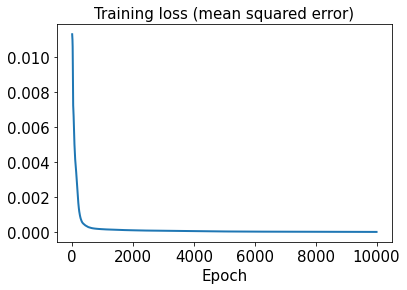

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

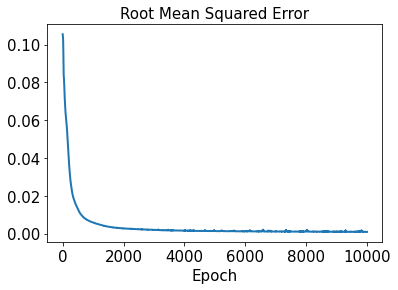

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

2/2 [==============================] - 0s 2ms/step - loss: 2.0851e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train_m2 = np.sum((sd.predict(x_train) - y_train)**2) / np.sum(y_train**2)
print(l2_error_train_m2)

6.381313e-05


In [55]:
l2_error_test_m2 = np.sum((sd.predict(x_test) - y_test)**2) / np.sum(y_test**2)
print(l2_error_test_m2)

0.020067215


In [56]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

8.009812e-05


In [57]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.075286664


In [58]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[5.9167513e-05, 6.413196e-05, 9.282044e-05, 0.00011055897, 5.6420675e-05, 0.0003368919, 6.350318e-05, 9.478113e-05, 4.0559422e-05, 6.568075e-05, 8.0583355e-05, 6.6934113e-06, 6.840901e-05, 5.9818012e-05, 5.7610294e-05, 7.5745695e-05, 9.551361e-05, 4.0956133e-05, 0.00010667152, 7.5176256e-05, 8.747047e-05, 9.545378e-05, 0.00012431684, 5.245037e-05, 3.097545e-05, 6.427337e-05, 1.8867775e-05, 0.00012243279, 7.7832025e-05, 0.00015447986, 2.442273e-05, 9.14351e-05, 0.00019738909, 6.704493e-05, 3.4498556e-05, 0.000106036314, 1.5833799e-05, 8.690093e-06, 3.529122e-05, 1.5948903e-05, 7.4177005e-05, 2.3245655e-05, 0.00027413495, 1.9530218e-05, 8.4154286e-05, 3.949196e-05, 3.7511625e-05, 0.00040827596, 0.000114393035, 0.00010244445, 2.532901e-05, 6.034199e-05, 9.762402e-05, 4.075825e-05]


In [59]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.016854797, 0.083011515, 0.034733474, 0.12512873, 0.024563028, 0.22512445, 0.015356453, 0.05553847, 0.0034577644, 0.030572066, 0.017019385, 0.0029841212, 0.0010514536, 0.17331326, 0.0075470987, 0.015251901, 0.011643838, 0.0042124153, 0.019815132, 0.106695004, 0.016364725, 0.5111578, 0.029769314, 0.28563657]


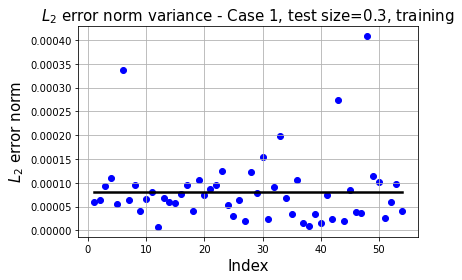

In [60]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

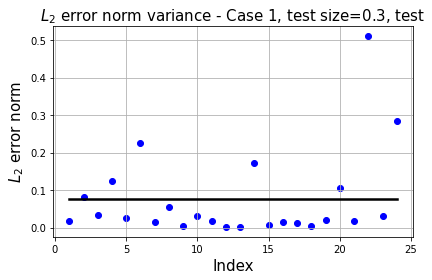

In [61]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

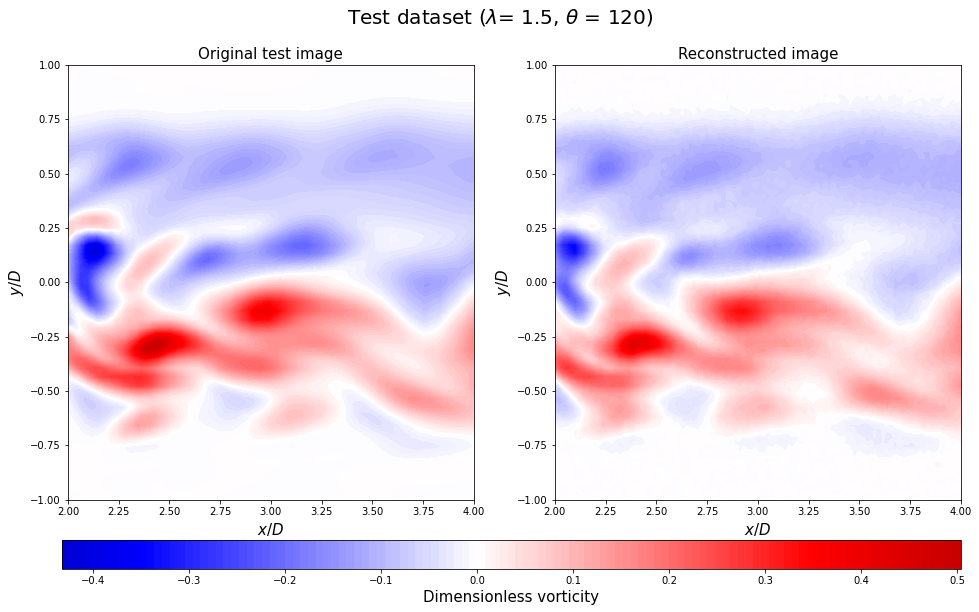

In [62]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

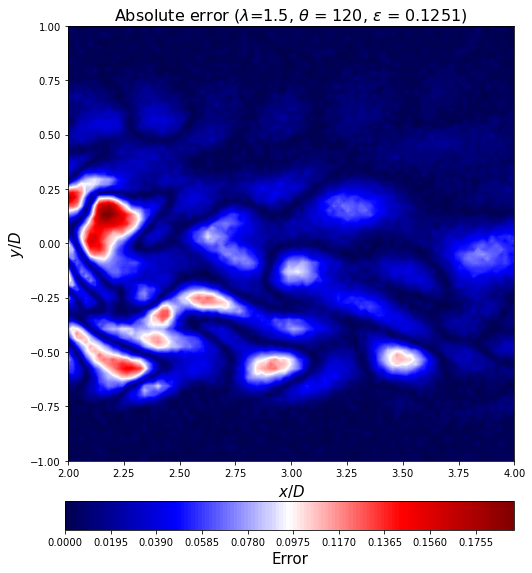

In [63]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()